# **How to Navigate Through the Notebook:**
You can run the whole notebook, but you may want to check first cells 47, 48.

**For cell 47:**
Run this cell if you want to run the model with the transformers. If you rin this cell, please don't run the one right below it so you don't override it.

**For cell 48:**
Run this cell if you didn't run cell 47, or if you want to run the original model.

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install keras
!pip install tensorflow-gpu==2.0.0-alpha0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-alpha0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-alpha0


In [3]:
import pandas as pd
import numpy as np
import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)

1.3.5
1.21.6
3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
1.0.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/MLData/UNSW_NB15_testing-set.csv')
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [6]:
#Loading training set into dataframe
#df = pd.read_csv('../input/unsw-nb15/UNSW_NB15_testing-set.csv')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [8]:
#Loading testing set into dataframe
#qp = pd.read_csv('../input/unsw-nb15/UNSW_NB15_training-set.csv')
qp = pd.read_csv('/content/drive/MyDrive/MLData/UNSW_NB15_training-set.csv')
qp

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [9]:
qp['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [10]:
df[df['attack_cat'] == 'Worms']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
49959,49960,0.338518,tcp,http,FIN,66,14,78481,612,233.370165,...,1,1,0,0,1,1,1,0,Worms,1
50077,50078,0.383961,tcp,http,FIN,14,6,8682,268,49.484193,...,1,1,0,0,1,1,1,0,Worms,1
51266,51267,0.000005,udp,-,INT,2,0,2050,0,200000.005100,...,1,1,0,0,0,1,2,0,Worms,1
51904,51905,0.544871,tcp,http,FIN,10,6,1282,268,27.529453,...,1,1,0,0,1,1,7,0,Worms,1
52833,52834,1.598383,tcp,http,FIN,10,8,1292,354,10.635749,...,1,1,0,0,1,1,1,0,Worms,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158130,158131,1.518915,tcp,http,FIN,10,8,1296,354,11.192199,...,1,1,0,0,1,1,1,0,Worms,1
164867,164868,0.694885,tcp,http,FIN,10,6,1294,268,21.586305,...,1,1,0,0,1,1,1,0,Worms,1
166196,166197,8.734500,tcp,http,FIN,114,686,5154,914758,91.476330,...,1,1,0,0,1,2,1,0,Worms,1
167633,167634,0.605943,tcp,http,FIN,10,6,1302,268,24.754803,...,1,8,0,0,1,4,1,0,Worms,1


In [11]:
#Dropping the last columns of training set
df = df.drop('id', 1) # we don't need it in this project
df.shape

<ipython-input-11-8b608af03331>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('id', 1) # we don't need it in this project


(175341, 44)

In [12]:
df = df.drop('label', 1) # we don't need it in this project
df.head()

<ipython-input-12-60c0a76dbe84>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('label', 1) # we don't need it in this project


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal


In [13]:
#Dropping the last columns of testing set
qp = qp.drop('id', 1)
qp = qp.drop('label', 1)
qp.shape

<ipython-input-13-8fbfe56943cf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  qp = qp.drop('id', 1)
<ipython-input-13-8fbfe56943cf>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  qp = qp.drop('label', 1)


(82332, 43)

In [14]:
df.isnull().values.any()

False

In [15]:
qp.isnull().values.any()

False

In [16]:
#defining col list
cols = ['proto','state','service']
cols

['proto', 'state', 'service']

In [17]:
#One-hot encoding
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each, 1)
    return df

In [18]:
#Merging train and test data
combined_data = pd.concat([df,qp])
combined_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [19]:
combined_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,1,2,0,0,0,2,1,0,Normal
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,1,0,0,0,3,2,0,Normal
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,1,0,0,0,1,1,1,Normal


In [20]:
tmp = combined_data.pop('attack_cat')

In [21]:
#Applying one hot encoding to combined data
combined_data = one_hot(combined_data,cols)

<ipython-input-17-1f2556177dac>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(each, 1)


In [22]:
combined_data

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,0,0,0,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,0,0,0,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,0,0,0,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,1,0,0,0,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
82328,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,0,0,0,0,0,0,0,0,0
82329,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,0,0,0,0,0,0
82330,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Function to min-max normalize
def normalize(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with normalized specified features
    """
    result = df.copy() # do not touch the original df
    for feature_name in cols:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > min_value:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [24]:
#Normalizing training set
new_train_df = normalize(combined_data,combined_data.columns)
new_train_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,2.024634e-03,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.083170e-02,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.705215e-02,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.802737e-02,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.490901e-03,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.389445e-02,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.992126,2.072552e-05,0.000100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
tmp.value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [26]:
#Appending class column to training set
new_train_df["Class"] = tmp
new_train_df

<ipython-input-26-92b49099d310>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_train_df["Class"] = tmp


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,Class
0,2.024634e-03,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1.083170e-02,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,2.705215e-02,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,2.802737e-02,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,7.490901e-03,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,1.389445e-02,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.992126,2.072552e-05,0.000100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [27]:
newer_train_df = new_train_df[new_train_df['Class'].isin(['Analysis'])]
newer_train_df['Class'].value_counts()

Analysis    2677
Name: Class, dtype: int64

In [28]:
analysisAE = newer_train_df.drop('Class', axis=1)

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [30]:
latent_dim = 20

encoder_inputs = keras.Input(shape=(196, 1))
x = layers.Convolution1D(64, kernel_size=64, padding="same",activation="tanh",input_shape=(196, 1))(encoder_inputs)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="tanh")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 196, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 196, 64)      4160        ['input_1[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 12544)        0           ['conv1d[0][0]']                 
                                                                                                  
 dense (Dense)                  (None, 32)           401440      ['flatten[0][0]']                
                                                                                            

In [31]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(196 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((196,64))(x)
x = layers.Conv1DTranspose(64, kernel_size=64, padding="same",activation="tanh")(x)
decoder_outputs = layers.Conv1DTranspose(1,64, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_1 (Dense)             (None, 12544)             263424    
                                                                 
 reshape (Reshape)           (None, 196, 64)           0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 196, 64)          262208    
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 196, 1)           4097      
 ranspose)                                                       
                                                                 
Total params: 529,729
Trainable params: 529,729
Non-trainab

In [32]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(analysisAE, test_size=0.2)

In [34]:
#(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=100, batch_size=128)

Epoch 1/100
21/21 [==============================] - 10s 21ms/step - loss: 36.2445 - reconstruction_loss: 12.2828 - kl_loss: 0.0862
Epoch 2/100
21/21 [==============================] - 0s 13ms/step - loss: 0.5313 - reconstruction_loss: 0.5415 - kl_loss: 0.0080
Epoch 3/100
21/21 [==============================] - 0s 13ms/step - loss: 0.5643 - reconstruction_loss: 0.5578 - kl_loss: 8.7998e-04
Epoch 4/100
21/21 [==============================] - 0s 13ms/step - loss: 0.5428 - reconstruction_loss: 0.5323 - kl_loss: 9.7684e-04
Epoch 5/100
21/21 [==============================] - 0s 13ms/step - loss: 0.5074 - reconstruction_loss: 0.4992 - kl_loss: 6.4626e-04
Epoch 6/100
21/21 [==============================] - 0s 12ms/step - loss: 0.4731 - reconstruction_loss: 0.4599 - kl_loss: 8.0267e-04
Epoch 7/100
21/21 [==============================] - 0s 13ms/step - loss: 0.4309 - reconstruction_loss: 0.4206 - kl_loss: 8.6517e-04
Epoch 8/100
21/21 [==============================] - 0s 13ms/step - loss: 

In [35]:
yi = 3
z_sample = np.array([np.random.uniform(low=-1, high=1, size=(latent_dim,))])
x_decoded = vae.decoder.predict(z_sample)

x_decoded = np.array([x_decoded[0][i][0] for i in range(196)])
x_decoded

1/1 [==============================] - 0s 147ms/step


array([2.20494898e-04, 1.26514016e-04, 8.51551304e-05, 1.20964352e-04,
       2.04637807e-04, 6.93060632e-04, 4.08441946e-03, 1.11010927e-03,
       2.02400799e-04, 1.12422626e-04, 8.74863981e-05, 6.61881495e-05,
       7.34234636e-05, 7.42070333e-05, 7.09103188e-05, 1.36966322e-04,
       1.07266288e-03, 7.62298587e-04, 7.66785117e-04, 1.10678852e-03,
       2.27645331e-04, 1.36768460e-04, 1.87289566e-04, 1.87304744e-04,
       1.97963425e-04, 2.22945251e-04, 2.50101381e-04, 5.85967617e-04,
       1.44483417e-03, 5.01300674e-04, 3.35831923e-04, 2.51266290e-04,
       1.22820071e-04, 6.65374755e-05, 8.61428125e-05, 1.12918657e-04,
       2.05718257e-04, 3.66765191e-04, 1.35339724e-04, 8.13106381e-05,
       9.38663070e-05, 8.46098192e-05, 8.41258952e-05, 7.37989321e-05,
       4.52243803e-05, 3.54198964e-05, 2.79526084e-05, 3.25644032e-05,
       4.37185226e-05, 4.79296032e-05, 3.64894258e-05, 1.78995087e-05,
       2.22012732e-05, 2.17978195e-05, 2.01844778e-05, 2.30217393e-05,
      

In [36]:
from tqdm import tqdm
for i in tqdm(range(5000)):
    z_sample = np.array([np.random.uniform(low=-1, high=1, size=(latent_dim,))])
    x_decoded = vae.decoder.predict(z_sample)

    x_decoded = np.array([x_decoded[0][i][0] for i in range(196)])
    analysisAE = analysisAE.append(pd.DataFrame(x_decoded.reshape(1,-1), columns=list(analysisAE)), ignore_index=True)



  0%|          | 0/5000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 3/5000 [00:00<03:54, 21.29it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 6/5000 [00:00<03:50, 21.69it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 9/5000 [00:00<03:49, 21.78it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 12/5000 [00:00<03:56, 21.12it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 15/5000 [00:00<03:51, 21.49it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 18/5000 [00:00<03:56, 21.04it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 21/5000 [00:01<04:05, 20.28it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 24/5000 [00:01<04:05, 20.26it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 27/5000 [00:01<04:00, 20.66it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 30/5000 [00:01<03:55, 21.11it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 33/5000 [00:01<04:00, 20.63it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 36/5000 [00:01<03:57, 20.90it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 39/5000 [00:01<04:04, 20.33it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 42/5000 [00:02<03:56, 20.96it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 45/5000 [00:02<03:54, 21.09it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 48/5000 [00:02<03:57, 20.86it/s]

1/1 [==============================] - 0s 14ms/step


  1%|          | 51/5000 [00:02<03:59, 20.68it/s]

1/1 [==============================] - 0s 13ms/step


  1%|          | 54/5000 [00:02<03:53, 21.20it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 57/5000 [00:02<03:59, 20.61it/s]

1/1 [==============================] - 0s 15ms/step


  1%|          | 60/5000 [00:02<03:55, 20.99it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▏         | 63/5000 [00:03<03:58, 20.74it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 66/5000 [00:03<03:51, 21.29it/s]

1/1 [==============================] - 0s 13ms/step


  1%|▏         | 69/5000 [00:03<03:57, 20.81it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▏         | 72/5000 [00:03<03:53, 21.10it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 75/5000 [00:03<03:51, 21.23it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 78/5000 [00:03<03:50, 21.37it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 81/5000 [00:03<03:49, 21.41it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 84/5000 [00:04<03:53, 21.03it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 87/5000 [00:04<04:01, 20.37it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 90/5000 [00:04<04:04, 20.04it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 93/5000 [00:04<04:11, 19.54it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 95/5000 [00:04<04:10, 19.56it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▏         | 97/5000 [00:04<04:15, 19.21it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 100/5000 [00:04<04:08, 19.74it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 103/5000 [00:04<04:08, 19.67it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 105/5000 [00:05<04:09, 19.59it/s]

1/1 [==============================] - 0s 14ms/step


  2%|▏         | 108/5000 [00:05<04:07, 19.77it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 111/5000 [00:05<03:59, 20.44it/s]

1/1 [==============================] - 0s 13ms/step


  2%|▏         | 114/5000 [00:05<03:54, 20.86it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 117/5000 [00:05<03:48, 21.40it/s]

1/1 [==============================] - 0s 15ms/step


  2%|▏         | 120/5000 [00:05<03:50, 21.18it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 123/5000 [00:05<03:48, 21.31it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 126/5000 [00:06<03:50, 21.16it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 129/5000 [00:06<03:47, 21.38it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 132/5000 [00:06<03:43, 21.76it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 135/5000 [00:06<03:44, 21.66it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 138/5000 [00:06<03:47, 21.34it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 141/5000 [00:06<03:45, 21.54it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 144/5000 [00:06<03:41, 21.88it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 147/5000 [00:07<03:49, 21.16it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 150/5000 [00:07<03:55, 20.61it/s]

1/1 [==============================] - 0s 16ms/step


  3%|▎         | 153/5000 [00:07<04:01, 20.07it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 156/5000 [00:07<03:56, 20.51it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 159/5000 [00:07<03:53, 20.77it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 162/5000 [00:07<03:51, 20.87it/s]

1/1 [==============================] - 0s 15ms/step


  3%|▎         | 165/5000 [00:07<03:49, 21.09it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 168/5000 [00:08<03:55, 20.54it/s]

1/1 [==============================] - 0s 14ms/step


  3%|▎         | 171/5000 [00:08<03:55, 20.51it/s]

1/1 [==============================] - 0s 13ms/step


  3%|▎         | 174/5000 [00:08<03:51, 20.86it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▎         | 177/5000 [00:08<03:47, 21.16it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 180/5000 [00:08<03:47, 21.20it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▎         | 183/5000 [00:08<03:52, 20.73it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▎         | 186/5000 [00:08<03:47, 21.14it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 189/5000 [00:09<03:51, 20.75it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 192/5000 [00:09<03:47, 21.17it/s]

1/1 [==============================] - 0s 16ms/step


  4%|▍         | 195/5000 [00:09<03:45, 21.31it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 198/5000 [00:09<03:44, 21.35it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 201/5000 [00:09<03:43, 21.45it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 204/5000 [00:09<03:46, 21.16it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 207/5000 [00:09<03:44, 21.30it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 210/5000 [00:10<04:00, 19.92it/s]

1/1 [==============================] - 0s 13ms/step


  4%|▍         | 213/5000 [00:10<03:56, 20.24it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 216/5000 [00:10<03:49, 20.85it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 219/5000 [00:10<03:48, 20.94it/s]

1/1 [==============================] - 0s 15ms/step


  4%|▍         | 222/5000 [00:10<03:44, 21.25it/s]

1/1 [==============================] - 0s 14ms/step


  4%|▍         | 225/5000 [00:10<03:43, 21.32it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 228/5000 [00:10<03:49, 20.81it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 231/5000 [00:11<03:55, 20.26it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 234/5000 [00:11<03:55, 20.22it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 237/5000 [00:11<03:50, 20.69it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▍         | 240/5000 [00:11<03:47, 20.91it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▍         | 243/5000 [00:11<03:52, 20.49it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▍         | 246/5000 [00:11<03:49, 20.74it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▍         | 249/5000 [00:11<03:51, 20.55it/s]

1/1 [==============================] - 0s 13ms/step


  5%|▌         | 252/5000 [00:12<03:55, 20.17it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 255/5000 [00:12<03:53, 20.30it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 258/5000 [00:12<03:53, 20.32it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 261/5000 [00:12<03:54, 20.25it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 264/5000 [00:12<03:53, 20.31it/s]

1/1 [==============================] - 0s 15ms/step


  5%|▌         | 267/5000 [00:12<03:48, 20.68it/s]

1/1 [==============================] - 0s 16ms/step


  5%|▌         | 270/5000 [00:13<04:03, 19.43it/s]

1/1 [==============================] - 0s 14ms/step


  5%|▌         | 272/5000 [00:13<04:07, 19.12it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 275/5000 [00:13<03:59, 19.75it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 278/5000 [00:13<03:52, 20.27it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 281/5000 [00:13<03:55, 20.07it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 284/5000 [00:13<03:48, 20.60it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 287/5000 [00:13<03:56, 19.93it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 290/5000 [00:14<03:51, 20.31it/s]

1/1 [==============================] - 0s 16ms/step


  6%|▌         | 293/5000 [00:14<03:57, 19.81it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 295/5000 [00:14<03:58, 19.72it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▌         | 298/5000 [00:14<03:49, 20.47it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▌         | 301/5000 [00:14<03:48, 20.57it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 304/5000 [00:14<03:44, 20.93it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 307/5000 [00:14<03:45, 20.78it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▌         | 310/5000 [00:14<03:43, 20.95it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 313/5000 [00:15<03:42, 21.04it/s]

1/1 [==============================] - 0s 15ms/step


  6%|▋         | 316/5000 [00:15<03:43, 20.94it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 319/5000 [00:15<03:50, 20.35it/s]

1/1 [==============================] - 0s 14ms/step


  6%|▋         | 322/5000 [00:15<03:52, 20.10it/s]

1/1 [==============================] - 0s 13ms/step


  6%|▋         | 325/5000 [00:15<03:48, 20.43it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 328/5000 [00:15<03:44, 20.77it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 331/5000 [00:15<03:44, 20.77it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 334/5000 [00:16<03:44, 20.75it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 337/5000 [00:16<03:43, 20.85it/s]

1/1 [==============================] - 0s 16ms/step


  7%|▋         | 340/5000 [00:16<03:43, 20.87it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 343/5000 [00:16<03:41, 21.05it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 346/5000 [00:16<03:47, 20.46it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 349/5000 [00:16<03:47, 20.47it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 352/5000 [00:17<03:51, 20.12it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 355/5000 [00:17<03:54, 19.78it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 358/5000 [00:17<03:47, 20.45it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 361/5000 [00:17<03:44, 20.63it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 364/5000 [00:17<03:45, 20.60it/s]

1/1 [==============================] - 0s 15ms/step


  7%|▋         | 367/5000 [00:17<03:42, 20.85it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 370/5000 [00:17<03:46, 20.43it/s]

1/1 [==============================] - 0s 14ms/step


  7%|▋         | 373/5000 [00:18<03:45, 20.51it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 376/5000 [00:18<03:48, 20.26it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 379/5000 [00:18<03:50, 20.05it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 382/5000 [00:18<03:48, 20.22it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 385/5000 [00:18<03:50, 20.02it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 388/5000 [00:18<03:47, 20.32it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 391/5000 [00:18<03:46, 20.37it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 394/5000 [00:19<03:44, 20.49it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 397/5000 [00:19<03:45, 20.37it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 400/5000 [00:19<03:47, 20.22it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 403/5000 [00:19<03:43, 20.57it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 406/5000 [00:19<03:44, 20.44it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 409/5000 [00:19<03:48, 20.06it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 412/5000 [00:19<03:45, 20.37it/s]

1/1 [==============================] - 0s 14ms/step


  8%|▊         | 415/5000 [00:20<03:45, 20.36it/s]

1/1 [==============================] - 0s 13ms/step


  8%|▊         | 418/5000 [00:20<03:46, 20.19it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 421/5000 [00:20<03:44, 20.43it/s]

1/1 [==============================] - 0s 15ms/step


  8%|▊         | 424/5000 [00:20<03:43, 20.51it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 427/5000 [00:20<03:41, 20.67it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▊         | 430/5000 [00:20<03:37, 20.97it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 433/5000 [00:20<03:40, 20.74it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▊         | 436/5000 [00:21<03:44, 20.32it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 439/5000 [00:21<03:43, 20.40it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 442/5000 [00:21<03:43, 20.40it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 445/5000 [00:21<03:49, 19.83it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 448/5000 [00:21<03:43, 20.40it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 451/5000 [00:21<03:46, 20.07it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 454/5000 [00:22<03:46, 20.05it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 457/5000 [00:22<03:42, 20.38it/s]

1/1 [==============================] - 0s 15ms/step


  9%|▉         | 460/5000 [00:22<03:44, 20.22it/s]

1/1 [==============================] - 0s 13ms/step


  9%|▉         | 463/5000 [00:22<03:43, 20.27it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 466/5000 [00:22<03:49, 19.72it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 468/5000 [00:22<03:50, 19.63it/s]

1/1 [==============================] - 0s 14ms/step


  9%|▉         | 471/5000 [00:22<03:47, 19.91it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 474/5000 [00:23<03:40, 20.49it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 477/5000 [00:23<03:40, 20.49it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 480/5000 [00:23<03:42, 20.32it/s]

1/1 [==============================] - 0s 16ms/step


 10%|▉         | 483/5000 [00:23<03:43, 20.20it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 486/5000 [00:23<03:44, 20.14it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 489/5000 [00:23<03:38, 20.63it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 492/5000 [00:23<03:38, 20.60it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 495/5000 [00:24<03:47, 19.81it/s]

1/1 [==============================] - 0s 14ms/step


 10%|▉         | 497/5000 [00:24<03:48, 19.74it/s]

1/1 [==============================] - 0s 15ms/step


 10%|▉         | 499/5000 [00:24<03:52, 19.33it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 501/5000 [00:24<03:53, 19.26it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 503/5000 [00:24<03:53, 19.29it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 506/5000 [00:24<03:45, 19.90it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 509/5000 [00:24<03:43, 20.10it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 512/5000 [00:24<03:46, 19.77it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 515/5000 [00:25<03:43, 20.05it/s]

1/1 [==============================] - 0s 15ms/step


 10%|█         | 518/5000 [00:25<03:43, 20.04it/s]

1/1 [==============================] - 0s 14ms/step


 10%|█         | 521/5000 [00:25<03:43, 20.03it/s]

1/1 [==============================] - 0s 13ms/step


 10%|█         | 524/5000 [00:25<03:41, 20.18it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 527/5000 [00:25<03:38, 20.49it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 530/5000 [00:25<03:40, 20.27it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 533/5000 [00:25<03:38, 20.46it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 536/5000 [00:26<03:40, 20.22it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 539/5000 [00:26<03:42, 20.03it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 542/5000 [00:26<03:41, 20.10it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 545/5000 [00:26<03:48, 19.50it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 547/5000 [00:26<03:50, 19.30it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█         | 550/5000 [00:26<03:43, 19.89it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 553/5000 [00:27<05:08, 14.42it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█         | 555/5000 [00:27<04:49, 15.38it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 557/5000 [00:27<04:34, 16.18it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█         | 560/5000 [00:27<04:09, 17.76it/s]

1/1 [==============================] - 0s 13ms/step


 11%|█▏        | 563/5000 [00:27<03:59, 18.50it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 566/5000 [00:27<03:51, 19.19it/s]

1/1 [==============================] - 0s 14ms/step


 11%|█▏        | 568/5000 [00:27<03:51, 19.18it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 571/5000 [00:28<03:46, 19.58it/s]

1/1 [==============================] - 0s 15ms/step


 11%|█▏        | 573/5000 [00:28<03:48, 19.38it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 576/5000 [00:28<03:41, 20.00it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 579/5000 [00:28<03:41, 20.00it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 582/5000 [00:28<03:44, 19.68it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 585/5000 [00:28<03:38, 20.24it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 588/5000 [00:28<03:36, 20.39it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 591/5000 [00:29<03:37, 20.30it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 594/5000 [00:29<03:37, 20.25it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 597/5000 [00:29<03:37, 20.22it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 600/5000 [00:29<03:40, 19.99it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 603/5000 [00:29<03:44, 19.60it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 606/5000 [00:29<03:41, 19.84it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 609/5000 [00:29<03:38, 20.08it/s]

1/1 [==============================] - 0s 14ms/step


 12%|█▏        | 612/5000 [00:30<03:50, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 614/5000 [00:30<03:47, 19.26it/s]

1/1 [==============================] - 0s 16ms/step


 12%|█▏        | 616/5000 [00:30<03:46, 19.39it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 618/5000 [00:30<03:51, 18.92it/s]

1/1 [==============================] - 0s 15ms/step


 12%|█▏        | 621/5000 [00:30<03:46, 19.33it/s]

1/1 [==============================] - 0s 13ms/step


 12%|█▏        | 624/5000 [00:30<03:39, 19.98it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 626/5000 [00:30<03:39, 19.95it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 629/5000 [00:30<03:37, 20.13it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 632/5000 [00:31<03:41, 19.72it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 635/5000 [00:31<03:35, 20.27it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 638/5000 [00:31<03:34, 20.36it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 641/5000 [00:31<03:35, 20.21it/s]

1/1 [==============================] - 0s 13ms/step


 13%|█▎        | 644/5000 [00:31<03:33, 20.40it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 647/5000 [00:31<03:35, 20.17it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 650/5000 [00:32<03:37, 20.01it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 653/5000 [00:32<03:41, 19.61it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 655/5000 [00:32<03:42, 19.50it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 657/5000 [00:32<03:43, 19.44it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 659/5000 [00:32<03:44, 19.31it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 661/5000 [00:32<03:44, 19.33it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 663/5000 [00:32<03:47, 19.03it/s]

1/1 [==============================] - 0s 14ms/step


 13%|█▎        | 665/5000 [00:32<03:46, 19.10it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█▎        | 668/5000 [00:32<03:42, 19.49it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 670/5000 [00:33<03:49, 18.91it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 672/5000 [00:33<03:50, 18.74it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 674/5000 [00:33<03:48, 18.94it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▎        | 676/5000 [00:33<03:45, 19.18it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 678/5000 [00:33<03:50, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 681/5000 [00:33<03:45, 19.16it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█▎        | 684/5000 [00:33<03:39, 19.68it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▎        | 686/5000 [00:33<03:43, 19.31it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 688/5000 [00:34<03:53, 18.47it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 690/5000 [00:34<03:56, 18.22it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 692/5000 [00:34<03:55, 18.26it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 695/5000 [00:34<03:43, 19.27it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 698/5000 [00:34<03:44, 19.15it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 701/5000 [00:34<03:40, 19.49it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 703/5000 [00:34<03:50, 18.62it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 705/5000 [00:34<03:56, 18.14it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 707/5000 [00:35<03:53, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 709/5000 [00:35<03:55, 18.23it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 711/5000 [00:35<03:49, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 713/5000 [00:35<03:52, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 14%|█▍        | 715/5000 [00:35<04:00, 17.83it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 717/5000 [00:35<04:06, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 719/5000 [00:35<03:57, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█▍        | 721/5000 [00:35<03:57, 18.00it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▍        | 723/5000 [00:35<04:05, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 726/5000 [00:36<03:52, 18.39it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 728/5000 [00:36<03:47, 18.77it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 731/5000 [00:36<03:38, 19.53it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▍        | 733/5000 [00:36<03:37, 19.57it/s]

1/1 [==============================] - 0s 13ms/step


 15%|█▍        | 736/5000 [00:36<03:36, 19.70it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▍        | 738/5000 [00:36<03:38, 19.55it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 741/5000 [00:36<03:30, 20.19it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 744/5000 [00:36<03:31, 20.17it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▍        | 747/5000 [00:37<03:27, 20.51it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 750/5000 [00:37<03:31, 20.08it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 753/5000 [00:37<03:35, 19.67it/s]

1/1 [==============================] - 0s 15ms/step


 15%|█▌        | 755/5000 [00:37<03:35, 19.72it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 757/5000 [00:37<03:39, 19.32it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 760/5000 [00:37<03:34, 19.73it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 762/5000 [00:37<03:42, 19.04it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 764/5000 [00:38<03:44, 18.87it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█▌        | 766/5000 [00:38<03:42, 18.99it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 769/5000 [00:38<03:37, 19.45it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 771/5000 [00:38<03:37, 19.47it/s]

1/1 [==============================] - 0s 14ms/step


 15%|█▌        | 773/5000 [00:38<03:35, 19.59it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 776/5000 [00:38<03:37, 19.43it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 779/5000 [00:38<03:34, 19.65it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 781/5000 [00:38<03:40, 19.10it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 783/5000 [00:38<03:42, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 785/5000 [00:39<03:42, 18.96it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 787/5000 [00:39<03:40, 19.06it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 789/5000 [00:39<03:38, 19.23it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 792/5000 [00:39<03:32, 19.84it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 794/5000 [00:39<03:36, 19.45it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 796/5000 [00:39<03:38, 19.26it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 799/5000 [00:39<03:31, 19.83it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 802/5000 [00:39<03:31, 19.83it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 804/5000 [00:40<03:34, 19.60it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▌        | 806/5000 [00:40<03:33, 19.64it/s]

1/1 [==============================] - 0s 16ms/step


 16%|█▌        | 808/5000 [00:40<03:34, 19.57it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 810/5000 [00:40<03:36, 19.33it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▌        | 812/5000 [00:40<03:35, 19.44it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 814/5000 [00:40<03:40, 18.97it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 816/5000 [00:40<03:45, 18.55it/s]

1/1 [==============================] - 0s 13ms/step


 16%|█▋        | 818/5000 [00:40<03:48, 18.31it/s]

1/1 [==============================] - 0s 14ms/step


 16%|█▋        | 820/5000 [00:40<03:42, 18.75it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 823/5000 [00:41<03:36, 19.26it/s]

1/1 [==============================] - 0s 15ms/step


 16%|█▋        | 825/5000 [00:41<03:38, 19.14it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 827/5000 [00:41<03:36, 19.30it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 829/5000 [00:41<03:34, 19.44it/s]

1/1 [==============================] - 0s 13ms/step


 17%|█▋        | 832/5000 [00:41<03:31, 19.71it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 834/5000 [00:41<03:33, 19.56it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 836/5000 [00:41<03:39, 18.93it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 838/5000 [00:41<03:36, 19.19it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 840/5000 [00:41<03:37, 19.16it/s]

1/1 [==============================] - 0s 14ms/step


 17%|█▋        | 842/5000 [00:42<03:37, 19.15it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 844/5000 [00:42<03:44, 18.49it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 846/5000 [00:42<03:51, 17.94it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 848/5000 [00:42<03:55, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 850/5000 [00:42<03:51, 17.89it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 852/5000 [00:42<04:00, 17.22it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 854/5000 [00:42<04:05, 16.92it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 856/5000 [00:42<03:57, 17.43it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 858/5000 [00:42<03:55, 17.57it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 860/5000 [00:43<03:58, 17.35it/s]

1/1 [==============================] - 0s 16ms/step


 17%|█▋        | 862/5000 [00:43<03:55, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 864/5000 [00:43<04:06, 16.76it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 866/5000 [00:43<04:04, 16.90it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 868/5000 [00:43<04:02, 17.05it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 870/5000 [00:43<04:04, 16.86it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 872/5000 [00:43<04:05, 16.85it/s]

1/1 [==============================] - 0s 15ms/step


 17%|█▋        | 874/5000 [00:43<04:01, 17.07it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 877/5000 [00:44<03:47, 18.09it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 879/5000 [00:44<03:43, 18.44it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 881/5000 [00:44<03:42, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 883/5000 [00:44<03:42, 18.54it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 885/5000 [00:44<03:40, 18.67it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 887/5000 [00:44<03:38, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 889/5000 [00:44<03:35, 19.04it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 891/5000 [00:44<03:44, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 893/5000 [00:44<03:58, 17.25it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 895/5000 [00:45<03:57, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 897/5000 [00:45<03:50, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 899/5000 [00:45<03:44, 18.25it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 901/5000 [00:45<03:39, 18.65it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 903/5000 [00:45<03:47, 18.01it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 905/5000 [00:45<03:44, 18.26it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 907/5000 [00:45<03:50, 17.79it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 909/5000 [00:45<03:55, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 911/5000 [00:45<03:53, 17.54it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 913/5000 [00:46<03:52, 17.55it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 915/5000 [00:46<03:53, 17.46it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 917/5000 [00:46<03:45, 18.07it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 919/5000 [00:46<03:40, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 18%|█▊        | 921/5000 [00:46<03:38, 18.66it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 923/5000 [00:46<03:37, 18.74it/s]

1/1 [==============================] - 0s 15ms/step


 18%|█▊        | 925/5000 [00:46<03:45, 18.10it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 927/5000 [00:46<03:42, 18.30it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 929/5000 [00:46<03:43, 18.19it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 931/5000 [00:47<03:41, 18.40it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▊        | 933/5000 [00:47<03:38, 18.63it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▊        | 935/5000 [00:47<03:41, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▊        | 937/5000 [00:47<03:36, 18.75it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 939/5000 [00:47<03:38, 18.60it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 941/5000 [00:47<03:35, 18.86it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 943/5000 [00:47<03:32, 19.11it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 945/5000 [00:47<03:35, 18.80it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 947/5000 [00:47<03:38, 18.53it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 949/5000 [00:48<03:36, 18.70it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 951/5000 [00:48<03:40, 18.32it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 953/5000 [00:48<03:41, 18.30it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 955/5000 [00:48<03:39, 18.39it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 957/5000 [00:48<03:42, 18.20it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 959/5000 [00:48<03:37, 18.54it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 961/5000 [00:48<03:35, 18.70it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 963/5000 [00:48<03:32, 19.01it/s]

1/1 [==============================] - 0s 14ms/step


 19%|█▉        | 965/5000 [00:48<03:41, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 967/5000 [00:48<03:43, 18.08it/s]

1/1 [==============================] - 0s 13ms/step


 19%|█▉        | 969/5000 [00:49<03:41, 18.23it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 971/5000 [00:49<03:42, 18.09it/s]

1/1 [==============================] - 0s 15ms/step


 19%|█▉        | 973/5000 [00:49<03:37, 18.50it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 975/5000 [00:49<03:41, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 20%|█▉        | 977/5000 [00:49<03:40, 18.25it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 979/5000 [00:49<03:44, 17.87it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 981/5000 [00:49<03:39, 18.35it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 983/5000 [00:49<03:40, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 985/5000 [00:49<03:36, 18.54it/s]

1/1 [==============================] - 0s 29ms/step


 20%|█▉        | 987/5000 [00:50<03:49, 17.51it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 989/5000 [00:50<03:42, 18.00it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 992/5000 [00:50<03:31, 18.95it/s]

1/1 [==============================] - 0s 16ms/step


 20%|█▉        | 994/5000 [00:50<03:32, 18.87it/s]

1/1 [==============================] - 0s 15ms/step


 20%|█▉        | 997/5000 [00:50<03:25, 19.48it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 1000/5000 [00:50<03:26, 19.37it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 1002/5000 [00:50<03:31, 18.86it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 1005/5000 [00:51<03:28, 19.13it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 1007/5000 [00:51<03:30, 18.95it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 1009/5000 [00:51<03:30, 18.94it/s]

1/1 [==============================] - 0s 15ms/step


 20%|██        | 1011/5000 [00:51<03:29, 19.08it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 1013/5000 [00:51<03:30, 18.91it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 1015/5000 [00:51<03:32, 18.72it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 1017/5000 [00:51<03:34, 18.56it/s]

1/1 [==============================] - 0s 16ms/step


 20%|██        | 1019/5000 [00:51<03:38, 18.24it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 1021/5000 [00:51<03:33, 18.61it/s]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 1023/5000 [00:51<03:32, 18.70it/s]

1/1 [==============================] - 0s 14ms/step


 20%|██        | 1025/5000 [00:52<03:39, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 1027/5000 [00:52<03:35, 18.46it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 1029/5000 [00:52<03:31, 18.74it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 1031/5000 [00:52<03:30, 18.82it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 1033/5000 [00:52<03:27, 19.14it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 1035/5000 [00:52<03:34, 18.52it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 1037/5000 [00:52<03:30, 18.83it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 1039/5000 [00:52<03:30, 18.84it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 1041/5000 [00:52<03:38, 18.09it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 1043/5000 [00:53<03:38, 18.11it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 1045/5000 [00:53<03:39, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 1047/5000 [00:53<03:35, 18.37it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██        | 1049/5000 [00:53<03:33, 18.52it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 1051/5000 [00:53<03:37, 18.13it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██        | 1053/5000 [00:53<03:35, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 1055/5000 [00:53<03:31, 18.63it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 1057/5000 [00:53<03:36, 18.22it/s]

1/1 [==============================] - 0s 13ms/step


 21%|██        | 1059/5000 [00:53<03:34, 18.38it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██        | 1061/5000 [00:54<03:42, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 21%|██▏       | 1063/5000 [00:54<03:35, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 1065/5000 [00:54<03:30, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 1067/5000 [00:54<03:28, 18.86it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██▏       | 1069/5000 [00:54<03:29, 18.78it/s]

1/1 [==============================] - 0s 14ms/step


 21%|██▏       | 1071/5000 [00:54<03:34, 18.33it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 1073/5000 [00:54<03:38, 17.97it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 1075/5000 [00:54<03:43, 17.53it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 1077/5000 [00:54<03:44, 17.45it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 1079/5000 [00:55<03:51, 16.96it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 1081/5000 [00:55<03:45, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 1083/5000 [00:55<03:39, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 1085/5000 [00:55<03:34, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 1087/5000 [00:55<03:34, 18.24it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 1090/5000 [00:55<03:28, 18.78it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 1092/5000 [00:55<03:34, 18.23it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 1095/5000 [00:55<03:26, 18.95it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 1097/5000 [00:56<03:33, 18.25it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 1099/5000 [00:56<03:37, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 1101/5000 [00:56<03:31, 18.42it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 1103/5000 [00:56<03:26, 18.84it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 1105/5000 [00:56<03:27, 18.75it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 1107/5000 [00:56<03:27, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 22%|██▏       | 1109/5000 [00:56<03:28, 18.65it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 1111/5000 [00:56<03:32, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 1113/5000 [00:56<03:31, 18.38it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 1115/5000 [00:57<03:34, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 22%|██▏       | 1117/5000 [00:57<03:38, 17.74it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 1119/5000 [00:57<03:37, 17.86it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 1121/5000 [00:57<03:32, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▏       | 1123/5000 [00:57<03:29, 18.48it/s]

1/1 [==============================] - 0s 14ms/step


 22%|██▎       | 1125/5000 [00:57<03:25, 18.84it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 1127/5000 [00:57<03:29, 18.51it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 1129/5000 [00:57<03:32, 18.22it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 1131/5000 [00:57<03:32, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 1134/5000 [00:58<03:24, 18.86it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 1136/5000 [00:58<03:28, 18.52it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 1138/5000 [00:58<03:27, 18.65it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 1140/5000 [00:58<03:25, 18.77it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 1142/5000 [00:58<03:26, 18.68it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 1144/5000 [00:58<03:25, 18.76it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 1146/5000 [00:58<03:28, 18.48it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 1148/5000 [00:58<03:34, 17.92it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 1150/5000 [00:58<03:33, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 1152/5000 [00:59<03:27, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 1154/5000 [00:59<03:28, 18.48it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 1156/5000 [00:59<03:30, 18.24it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 1158/5000 [00:59<03:31, 18.13it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 1160/5000 [00:59<03:32, 18.10it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 1162/5000 [00:59<03:34, 17.93it/s]

1/1 [==============================] - 0s 13ms/step


 23%|██▎       | 1164/5000 [00:59<03:35, 17.83it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 1166/5000 [00:59<03:33, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 1168/5000 [00:59<03:36, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 23%|██▎       | 1170/5000 [01:00<03:33, 17.97it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 1172/5000 [01:00<03:33, 17.94it/s]

1/1 [==============================] - 0s 14ms/step


 23%|██▎       | 1174/5000 [01:00<03:29, 18.27it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 1176/5000 [01:00<03:24, 18.73it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▎       | 1178/5000 [01:00<03:24, 18.69it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 1180/5000 [01:00<03:23, 18.74it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▎       | 1182/5000 [01:00<03:23, 18.76it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▎       | 1184/5000 [01:00<03:21, 18.90it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▎       | 1186/5000 [01:00<03:23, 18.74it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 1188/5000 [01:00<03:27, 18.34it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 1190/5000 [01:01<03:25, 18.55it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 1192/5000 [01:01<03:28, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 1194/5000 [01:01<03:31, 18.02it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 1197/5000 [01:01<03:26, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 1199/5000 [01:01<03:27, 18.29it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 1201/5000 [01:01<03:23, 18.67it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 1203/5000 [01:01<03:24, 18.56it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 1205/5000 [01:01<03:24, 18.59it/s]

1/1 [==============================] - 0s 14ms/step


 24%|██▍       | 1207/5000 [01:02<03:26, 18.33it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 1209/5000 [01:02<03:22, 18.68it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 1211/5000 [01:02<03:28, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 1213/5000 [01:02<03:25, 18.45it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 1215/5000 [01:02<03:23, 18.57it/s]

1/1 [==============================] - 0s 15ms/step


 24%|██▍       | 1217/5000 [01:02<03:24, 18.53it/s]

1/1 [==============================] - 0s 13ms/step


 24%|██▍       | 1219/5000 [01:02<03:24, 18.49it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 1221/5000 [01:02<03:22, 18.64it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 1223/5000 [01:02<03:21, 18.75it/s]

1/1 [==============================] - 0s 16ms/step


 24%|██▍       | 1225/5000 [01:02<03:18, 19.04it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 1227/5000 [01:03<03:23, 18.53it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 1229/5000 [01:03<03:27, 18.15it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 1232/5000 [01:03<03:20, 18.83it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 1234/5000 [01:03<03:19, 18.87it/s]

1/1 [==============================] - 0s 13ms/step


 25%|██▍       | 1236/5000 [01:03<03:24, 18.42it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▍       | 1238/5000 [01:03<03:27, 18.15it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 1240/5000 [01:03<03:27, 18.16it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▍       | 1242/5000 [01:03<03:28, 18.04it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 1244/5000 [01:04<03:23, 18.45it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 1246/5000 [01:04<03:26, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▍       | 1248/5000 [01:04<03:30, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 1250/5000 [01:04<03:27, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 1252/5000 [01:04<03:24, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 1255/5000 [01:04<03:20, 18.71it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 1257/5000 [01:04<03:16, 19.02it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 1259/5000 [01:04<03:24, 18.31it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 1261/5000 [01:04<03:22, 18.45it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 1263/5000 [01:05<03:28, 17.94it/s]

1/1 [==============================] - 0s 15ms/step


 25%|██▌       | 1265/5000 [01:05<03:30, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 1267/5000 [01:05<03:30, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 1269/5000 [01:05<03:29, 17.77it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██▌       | 1271/5000 [01:05<03:30, 17.71it/s]

1/1 [==============================] - 0s 14ms/step


 25%|██▌       | 1273/5000 [01:05<03:29, 17.81it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 1275/5000 [01:05<03:29, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1277/5000 [01:05<03:27, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1279/5000 [01:05<03:25, 18.09it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 1281/5000 [01:06<03:26, 18.01it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 1283/5000 [01:06<03:30, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 1285/5000 [01:06<03:31, 17.53it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1287/5000 [01:06<03:28, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 1289/5000 [01:06<03:27, 17.88it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1291/5000 [01:06<03:32, 17.42it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 1293/5000 [01:06<03:30, 17.60it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1295/5000 [01:06<03:24, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▌       | 1297/5000 [01:06<03:20, 18.46it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1299/5000 [01:07<03:27, 17.81it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 1302/5000 [01:07<03:20, 18.41it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1304/5000 [01:07<03:22, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 1306/5000 [01:07<03:22, 18.25it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1308/5000 [01:07<03:21, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▌       | 1310/5000 [01:07<03:21, 18.30it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▌       | 1312/5000 [01:07<03:25, 17.96it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██▋       | 1314/5000 [01:07<03:26, 17.82it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 1316/5000 [01:08<03:26, 17.84it/s]

1/1 [==============================] - 0s 13ms/step


 26%|██▋       | 1318/5000 [01:08<03:27, 17.78it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 1320/5000 [01:08<03:29, 17.54it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▋       | 1322/5000 [01:08<03:30, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 26%|██▋       | 1324/5000 [01:08<03:33, 17.21it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 1326/5000 [01:08<03:27, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 1328/5000 [01:08<03:26, 17.78it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1330/5000 [01:08<03:24, 17.91it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 1332/5000 [01:08<03:20, 18.26it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 1334/5000 [01:09<03:19, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1336/5000 [01:09<03:26, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1338/5000 [01:09<03:25, 17.83it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1340/5000 [01:09<03:26, 17.73it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 1342/5000 [01:09<03:26, 17.69it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 1344/5000 [01:09<03:22, 18.06it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 1346/5000 [01:09<03:19, 18.34it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 1348/5000 [01:09<03:22, 18.03it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 1350/5000 [01:09<03:23, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1352/5000 [01:10<03:25, 17.78it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 1354/5000 [01:10<03:30, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1356/5000 [01:10<03:24, 17.78it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 1358/5000 [01:10<03:27, 17.55it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 1360/5000 [01:10<03:25, 17.68it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 1362/5000 [01:10<03:22, 17.99it/s]

1/1 [==============================] - 0s 13ms/step


 27%|██▋       | 1364/5000 [01:10<03:20, 18.11it/s]

1/1 [==============================] - 0s 16ms/step


 27%|██▋       | 1366/5000 [01:10<03:24, 17.79it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1368/5000 [01:10<03:24, 17.80it/s]

1/1 [==============================] - 0s 14ms/step


 27%|██▋       | 1370/5000 [01:11<03:25, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 1372/5000 [01:11<03:28, 17.36it/s]

1/1 [==============================] - 0s 15ms/step


 27%|██▋       | 1374/5000 [01:11<03:23, 17.79it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 1376/5000 [01:11<03:25, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1378/5000 [01:11<03:25, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 1380/5000 [01:11<03:21, 17.99it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1382/5000 [01:11<03:20, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1384/5000 [01:11<03:26, 17.55it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1386/5000 [01:11<03:21, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1388/5000 [01:12<03:22, 17.84it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1390/5000 [01:12<03:19, 18.12it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1392/5000 [01:12<03:18, 18.16it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1394/5000 [01:12<03:16, 18.39it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1396/5000 [01:12<03:21, 17.89it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1398/5000 [01:12<03:25, 17.53it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 1400/5000 [01:12<03:21, 17.85it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 1402/5000 [01:12<03:20, 17.92it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1404/5000 [01:12<03:16, 18.33it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 1406/5000 [01:13<03:19, 18.04it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 1408/5000 [01:13<03:18, 18.12it/s]

1/1 [==============================] - 0s 16ms/step


 28%|██▊       | 1410/5000 [01:13<03:18, 18.07it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 1412/5000 [01:13<03:18, 18.12it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 1414/5000 [01:13<03:21, 17.82it/s]

1/1 [==============================] - 0s 15ms/step


 28%|██▊       | 1416/5000 [01:13<03:17, 18.19it/s]

1/1 [==============================] - 0s 13ms/step


 28%|██▊       | 1418/5000 [01:13<03:16, 18.20it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 1420/5000 [01:13<03:23, 17.56it/s]

1/1 [==============================] - 0s 14ms/step


 28%|██▊       | 1422/5000 [01:13<03:18, 17.99it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 1424/5000 [01:14<03:22, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 1426/5000 [01:14<03:18, 18.00it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 1428/5000 [01:14<03:14, 18.41it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▊       | 1430/5000 [01:14<03:14, 18.40it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 1432/5000 [01:14<03:27, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▊       | 1434/5000 [01:14<03:20, 17.81it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▊       | 1436/5000 [01:14<03:21, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1438/5000 [01:14<03:20, 17.75it/s]

1/1 [==============================] - 0s 16ms/step


 29%|██▉       | 1440/5000 [01:15<05:21, 11.07it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 1442/5000 [01:15<04:40, 12.70it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 1444/5000 [01:15<04:18, 13.74it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1446/5000 [01:15<04:01, 14.71it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 1448/5000 [01:15<03:48, 15.54it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1450/5000 [01:15<03:43, 15.86it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1452/5000 [01:15<03:36, 16.37it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 1454/5000 [01:15<03:34, 16.50it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 1456/5000 [01:16<03:32, 16.64it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1458/5000 [01:16<03:24, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1460/5000 [01:16<03:19, 17.77it/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 1462/5000 [01:16<03:18, 17.85it/s]

1/1 [==============================] - 0s 15ms/step


 29%|██▉       | 1464/5000 [01:16<03:18, 17.77it/s]

1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 1466/5000 [01:16<03:17, 17.86it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 1468/5000 [01:16<03:22, 17.43it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1470/5000 [01:16<03:17, 17.89it/s]

1/1 [==============================] - 0s 14ms/step


 29%|██▉       | 1472/5000 [01:16<03:12, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 1474/5000 [01:17<03:13, 18.26it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1476/5000 [01:17<03:13, 18.18it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1478/5000 [01:17<03:12, 18.32it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1480/5000 [01:17<03:08, 18.65it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 1482/5000 [01:17<03:16, 17.87it/s]

1/1 [==============================] - 0s 16ms/step


 30%|██▉       | 1484/5000 [01:17<03:14, 18.10it/s]

1/1 [==============================] - 0s 13ms/step


 30%|██▉       | 1486/5000 [01:17<03:11, 18.37it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1488/5000 [01:17<03:22, 17.33it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1490/5000 [01:18<03:22, 17.30it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 1492/5000 [01:18<03:23, 17.20it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1494/5000 [01:18<03:17, 17.77it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1496/5000 [01:18<03:15, 17.88it/s]

1/1 [==============================] - 0s 14ms/step


 30%|██▉       | 1498/5000 [01:18<03:21, 17.42it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 1500/5000 [01:18<03:21, 17.38it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 1502/5000 [01:18<03:15, 17.87it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 1504/5000 [01:18<03:16, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 1506/5000 [01:18<03:14, 17.98it/s]

1/1 [==============================] - 0s 13ms/step


 30%|███       | 1508/5000 [01:19<03:13, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 1510/5000 [01:19<03:08, 18.51it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 1512/5000 [01:19<03:09, 18.41it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 1514/5000 [01:19<03:14, 17.91it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 1516/5000 [01:19<03:10, 18.33it/s]

1/1 [==============================] - 0s 15ms/step


 30%|███       | 1518/5000 [01:19<03:20, 17.39it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 1520/5000 [01:19<03:24, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 1522/5000 [01:19<03:15, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 30%|███       | 1524/5000 [01:19<03:12, 18.08it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1526/5000 [01:20<03:11, 18.19it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 1528/5000 [01:20<03:15, 17.78it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1530/5000 [01:20<03:12, 18.04it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1532/5000 [01:20<03:10, 18.22it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 1534/5000 [01:20<03:10, 18.19it/s]

1/1 [==============================] - 0s 16ms/step


 31%|███       | 1536/5000 [01:20<03:08, 18.41it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 1538/5000 [01:20<03:12, 17.99it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 1540/5000 [01:20<03:09, 18.28it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 1542/5000 [01:20<03:10, 18.15it/s]

1/1 [==============================] - 0s 13ms/step


 31%|███       | 1544/5000 [01:21<03:10, 18.18it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1546/5000 [01:21<03:12, 17.92it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 1548/5000 [01:21<03:10, 18.08it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 1550/5000 [01:21<03:12, 17.95it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1552/5000 [01:21<03:14, 17.70it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1554/5000 [01:21<03:10, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 1556/5000 [01:21<03:22, 17.03it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1558/5000 [01:21<03:28, 16.54it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███       | 1560/5000 [01:21<03:27, 16.61it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███       | 1562/5000 [01:22<03:26, 16.64it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 1564/5000 [01:22<03:20, 17.13it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 1566/5000 [01:22<03:21, 17.00it/s]

1/1 [==============================] - 0s 15ms/step


 31%|███▏      | 1568/5000 [01:22<03:15, 17.58it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 1570/5000 [01:22<03:16, 17.46it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 1572/5000 [01:22<03:12, 17.76it/s]

1/1 [==============================] - 0s 14ms/step


 31%|███▏      | 1574/5000 [01:22<03:20, 17.10it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 1576/5000 [01:22<03:18, 17.26it/s]

1/1 [==============================] - 0s 13ms/step


 32%|███▏      | 1578/5000 [01:22<03:10, 17.95it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 1580/5000 [01:23<03:16, 17.44it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 1582/5000 [01:23<03:13, 17.62it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1584/5000 [01:23<03:08, 18.11it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1586/5000 [01:23<03:08, 18.12it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 1588/5000 [01:23<03:12, 17.75it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1590/5000 [01:23<03:12, 17.73it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1592/5000 [01:23<03:14, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 1594/5000 [01:23<03:15, 17.40it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 1596/5000 [01:23<03:15, 17.39it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 1598/5000 [01:24<03:12, 17.67it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 1600/5000 [01:24<03:19, 17.03it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 1602/5000 [01:24<03:15, 17.34it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 1604/5000 [01:24<03:15, 17.39it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1606/5000 [01:24<03:11, 17.73it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 1608/5000 [01:24<03:09, 17.90it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 1610/5000 [01:24<03:20, 16.94it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1612/5000 [01:24<03:15, 17.33it/s]

1/1 [==============================] - 0s 16ms/step


 32%|███▏      | 1614/5000 [01:25<03:17, 17.16it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1616/5000 [01:25<03:21, 16.79it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1618/5000 [01:25<03:16, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 32%|███▏      | 1620/5000 [01:25<03:20, 16.90it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1622/5000 [01:25<03:18, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 32%|███▏      | 1624/5000 [01:25<03:16, 17.19it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1626/5000 [01:25<03:18, 17.02it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1628/5000 [01:25<03:15, 17.24it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1630/5000 [01:25<03:20, 16.82it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1632/5000 [01:26<03:18, 16.97it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 1634/5000 [01:26<03:14, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 1636/5000 [01:26<03:11, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1638/5000 [01:26<03:09, 17.77it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 1640/5000 [01:26<03:11, 17.52it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1642/5000 [01:26<03:06, 17.97it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1644/5000 [01:26<03:06, 18.02it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 1646/5000 [01:26<03:10, 17.57it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1648/5000 [01:26<03:05, 18.04it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1650/5000 [01:27<03:09, 17.66it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1652/5000 [01:27<03:09, 17.67it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1654/5000 [01:27<03:04, 18.10it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1656/5000 [01:27<03:08, 17.76it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1658/5000 [01:27<03:10, 17.57it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1660/5000 [01:27<03:10, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 1662/5000 [01:27<03:13, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 1664/5000 [01:27<03:19, 16.76it/s]

1/1 [==============================] - 0s 15ms/step


 33%|███▎      | 1666/5000 [01:28<03:10, 17.52it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1668/5000 [01:28<03:08, 17.70it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1670/5000 [01:28<03:09, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 33%|███▎      | 1672/5000 [01:28<03:11, 17.40it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 1674/5000 [01:28<03:13, 17.16it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 1676/5000 [01:28<03:13, 17.18it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▎      | 1678/5000 [01:28<03:16, 16.93it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▎      | 1680/5000 [01:28<03:12, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 1682/5000 [01:28<03:16, 16.91it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▎      | 1684/5000 [01:29<03:12, 17.27it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▎      | 1686/5000 [01:29<03:12, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 1688/5000 [01:29<03:08, 17.53it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 1690/5000 [01:29<03:13, 17.12it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 1692/5000 [01:29<03:14, 17.03it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 1694/5000 [01:29<03:12, 17.18it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 1696/5000 [01:29<03:15, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 1698/5000 [01:29<03:15, 16.87it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 1700/5000 [01:30<03:22, 16.28it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 1702/5000 [01:30<03:23, 16.20it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 1704/5000 [01:30<03:17, 16.70it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 1706/5000 [01:30<03:16, 16.77it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 1708/5000 [01:30<03:12, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 1710/5000 [01:30<03:14, 16.90it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 1712/5000 [01:30<03:12, 17.09it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 1714/5000 [01:30<03:16, 16.72it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 1716/5000 [01:30<03:12, 17.09it/s]

1/1 [==============================] - 0s 15ms/step


 34%|███▍      | 1718/5000 [01:31<03:12, 17.06it/s]

1/1 [==============================] - 0s 13ms/step


 34%|███▍      | 1720/5000 [01:31<03:09, 17.34it/s]

1/1 [==============================] - 0s 14ms/step


 34%|███▍      | 1722/5000 [01:31<03:06, 17.61it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 1724/5000 [01:31<03:06, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 1726/5000 [01:31<03:07, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 1728/5000 [01:31<03:03, 17.82it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 1730/5000 [01:31<03:15, 16.73it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 1732/5000 [01:31<03:07, 17.42it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 1734/5000 [01:31<03:13, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 1736/5000 [01:32<03:13, 16.86it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 1738/5000 [01:32<03:09, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 1740/5000 [01:32<03:09, 17.24it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 1742/5000 [01:32<03:06, 17.47it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 1744/5000 [01:32<03:07, 17.33it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▍      | 1746/5000 [01:32<03:05, 17.59it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▍      | 1748/5000 [01:32<03:03, 17.74it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 1750/5000 [01:32<03:10, 17.08it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 1752/5000 [01:33<03:07, 17.36it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 1754/5000 [01:33<03:12, 16.89it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 1756/5000 [01:33<03:09, 17.08it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 1758/5000 [01:33<03:08, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 1760/5000 [01:33<03:11, 16.93it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 1762/5000 [01:33<03:06, 17.33it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 1764/5000 [01:33<03:03, 17.62it/s]

1/1 [==============================] - 0s 15ms/step


 35%|███▌      | 1766/5000 [01:33<03:05, 17.39it/s]

1/1 [==============================] - 0s 13ms/step


 35%|███▌      | 1768/5000 [01:33<03:03, 17.58it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▌      | 1770/5000 [01:34<03:11, 16.89it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 1772/5000 [01:34<03:09, 17.05it/s]

1/1 [==============================] - 0s 14ms/step


 35%|███▌      | 1774/5000 [01:34<03:05, 17.40it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1776/5000 [01:34<03:01, 17.72it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1778/5000 [01:34<03:02, 17.61it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1780/5000 [01:34<03:03, 17.58it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 1782/5000 [01:34<03:04, 17.44it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 1784/5000 [01:34<03:02, 17.63it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1786/5000 [01:34<03:03, 17.48it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1788/5000 [01:35<03:04, 17.37it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1790/5000 [01:35<03:03, 17.49it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 1792/5000 [01:35<03:01, 17.65it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 1794/5000 [01:35<03:03, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 1796/5000 [01:35<03:05, 17.32it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1798/5000 [01:35<03:08, 17.02it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 1800/5000 [01:35<03:10, 16.83it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 1802/5000 [01:35<03:10, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 1804/5000 [01:36<03:07, 17.01it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 1806/5000 [01:36<03:05, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▌      | 1808/5000 [01:36<03:02, 17.50it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▌      | 1810/5000 [01:36<03:10, 16.72it/s]

1/1 [==============================] - 0s 15ms/step


 36%|███▌      | 1812/5000 [01:36<03:08, 16.92it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 1814/5000 [01:36<03:05, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 1816/5000 [01:36<03:08, 16.92it/s]

1/1 [==============================] - 0s 17ms/step


 36%|███▋      | 1818/5000 [01:36<03:07, 17.00it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 1820/5000 [01:36<03:09, 16.75it/s]

1/1 [==============================] - 0s 16ms/step


 36%|███▋      | 1822/5000 [01:37<03:08, 16.84it/s]

1/1 [==============================] - 0s 14ms/step


 36%|███▋      | 1824/5000 [01:37<03:09, 16.79it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1826/5000 [01:37<03:06, 17.06it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 1828/5000 [01:37<03:01, 17.50it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 1830/5000 [01:37<03:04, 17.22it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1832/5000 [01:37<03:02, 17.33it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 1834/5000 [01:37<03:06, 17.01it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 1836/5000 [01:37<03:08, 16.78it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 1838/5000 [01:38<03:04, 17.12it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 1840/5000 [01:38<03:05, 17.03it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1842/5000 [01:38<03:04, 17.15it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 1844/5000 [01:38<03:07, 16.80it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 1846/5000 [01:38<03:04, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1848/5000 [01:38<03:01, 17.41it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1850/5000 [01:38<03:00, 17.48it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 1852/5000 [01:38<03:03, 17.20it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 1854/5000 [01:38<03:01, 17.36it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 1856/5000 [01:39<03:03, 17.17it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1858/5000 [01:39<03:11, 16.44it/s]

1/1 [==============================] - 0s 18ms/step


 37%|███▋      | 1860/5000 [01:39<03:07, 16.79it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1862/5000 [01:39<03:06, 16.84it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1864/5000 [01:39<03:03, 17.11it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1866/5000 [01:39<03:02, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 37%|███▋      | 1868/5000 [01:39<02:57, 17.66it/s]

1/1 [==============================] - 0s 16ms/step


 37%|███▋      | 1870/5000 [01:39<02:59, 17.45it/s]

1/1 [==============================] - 0s 15ms/step


 37%|███▋      | 1872/5000 [01:40<03:03, 17.04it/s]

1/1 [==============================] - 0s 13ms/step


 37%|███▋      | 1874/5000 [01:40<03:05, 16.85it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1876/5000 [01:40<03:05, 16.80it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1878/5000 [01:40<03:10, 16.39it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 1880/5000 [01:40<03:03, 17.02it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 1882/5000 [01:40<03:01, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 1884/5000 [01:40<03:08, 16.52it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1886/5000 [01:40<03:06, 16.66it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1888/5000 [01:40<03:03, 16.93it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 1890/5000 [01:41<03:02, 17.02it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1892/5000 [01:41<03:08, 16.45it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███▊      | 1894/5000 [01:41<03:01, 17.15it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1896/5000 [01:41<03:00, 17.20it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 1898/5000 [01:41<02:58, 17.36it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 1900/5000 [01:41<02:58, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 1902/5000 [01:41<03:05, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 1904/5000 [01:41<02:59, 17.21it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1906/5000 [01:42<02:57, 17.44it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███▊      | 1908/5000 [01:42<03:01, 17.01it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1910/5000 [01:42<03:00, 17.12it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 1912/5000 [01:42<03:02, 16.96it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1914/5000 [01:42<02:58, 17.26it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1916/5000 [01:42<03:00, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███▊      | 1918/5000 [01:42<02:58, 17.29it/s]

1/1 [==============================] - 0s 15ms/step


 38%|███▊      | 1920/5000 [01:42<02:55, 17.51it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 1922/5000 [01:42<02:59, 17.14it/s]

1/1 [==============================] - 0s 16ms/step


 38%|███▊      | 1924/5000 [01:43<03:02, 16.83it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 1926/5000 [01:43<03:07, 16.43it/s]

1/1 [==============================] - 0s 14ms/step


 39%|███▊      | 1928/5000 [01:43<03:13, 15.89it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▊      | 1930/5000 [01:43<03:12, 15.96it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▊      | 1932/5000 [01:43<03:12, 15.97it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▊      | 1934/5000 [01:43<03:09, 16.18it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▊      | 1936/5000 [01:43<03:09, 16.20it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 1938/5000 [01:43<03:12, 15.91it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 1940/5000 [01:44<03:08, 16.20it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 1942/5000 [01:44<03:12, 15.88it/s]

1/1 [==============================] - 0s 17ms/step


 39%|███▉      | 1944/5000 [01:44<03:14, 15.74it/s]

1/1 [==============================] - 0s 18ms/step


 39%|███▉      | 1946/5000 [01:44<03:15, 15.62it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 1948/5000 [01:44<03:14, 15.65it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 1950/5000 [01:44<03:15, 15.60it/s]

1/1 [==============================] - 0s 14ms/step


 39%|███▉      | 1952/5000 [01:44<03:10, 16.00it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███▉      | 1954/5000 [01:44<03:08, 16.18it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 1956/5000 [01:45<03:06, 16.33it/s]

1/1 [==============================] - 0s 14ms/step


 39%|███▉      | 1958/5000 [01:45<03:00, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 1960/5000 [01:45<03:01, 16.71it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 1962/5000 [01:45<02:58, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 39%|███▉      | 1964/5000 [01:45<02:55, 17.30it/s]

1/1 [==============================] - 0s 14ms/step


 39%|███▉      | 1966/5000 [01:45<02:58, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 39%|███▉      | 1968/5000 [01:45<02:58, 17.02it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 1970/5000 [01:45<02:55, 17.27it/s]

1/1 [==============================] - 0s 16ms/step


 39%|███▉      | 1972/5000 [01:46<02:57, 17.02it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███▉      | 1974/5000 [01:46<02:57, 17.08it/s]

1/1 [==============================] - 0s 14ms/step


 40%|███▉      | 1976/5000 [01:46<02:55, 17.25it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 1978/5000 [01:46<02:57, 17.06it/s]

1/1 [==============================] - 0s 14ms/step


 40%|███▉      | 1980/5000 [01:46<02:55, 17.19it/s]

1/1 [==============================] - 0s 13ms/step


 40%|███▉      | 1982/5000 [01:46<02:54, 17.27it/s]

1/1 [==============================] - 0s 13ms/step


 40%|███▉      | 1984/5000 [01:46<02:56, 17.13it/s]

1/1 [==============================] - 0s 15ms/step


 40%|███▉      | 1986/5000 [01:46<03:03, 16.40it/s]

1/1 [==============================] - 0s 14ms/step


 40%|███▉      | 1988/5000 [01:46<02:58, 16.85it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 1990/5000 [01:47<02:56, 17.03it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 1992/5000 [01:47<02:58, 16.82it/s]

1/1 [==============================] - 0s 15ms/step


 40%|███▉      | 1994/5000 [01:47<02:58, 16.85it/s]

1/1 [==============================] - 0s 16ms/step


 40%|███▉      | 1996/5000 [01:47<03:01, 16.58it/s]

1/1 [==============================] - 0s 14ms/step


 40%|███▉      | 1998/5000 [01:47<03:03, 16.33it/s]

1/1 [==============================] - 0s 15ms/step


 40%|████      | 2000/5000 [01:47<02:56, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 2002/5000 [01:47<03:00, 16.64it/s]

1/1 [==============================] - 0s 15ms/step


 40%|████      | 2004/5000 [01:47<02:58, 16.80it/s]

1/1 [==============================] - 0s 17ms/step


 40%|████      | 2006/5000 [01:48<02:54, 17.12it/s]

1/1 [==============================] - 0s 15ms/step


 40%|████      | 2008/5000 [01:48<02:53, 17.29it/s]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 2010/5000 [01:48<02:49, 17.65it/s]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 2012/5000 [01:48<02:59, 16.63it/s]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 2014/5000 [01:48<02:58, 16.71it/s]

1/1 [==============================] - 0s 15ms/step


 40%|████      | 2016/5000 [01:48<02:57, 16.85it/s]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 2018/5000 [01:48<02:53, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


 40%|████      | 2020/5000 [01:48<02:58, 16.68it/s]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 2022/5000 [01:48<02:57, 16.78it/s]

1/1 [==============================] - 0s 14ms/step


 40%|████      | 2024/5000 [01:49<02:57, 16.77it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████      | 2026/5000 [01:49<02:52, 17.19it/s]

1/1 [==============================] - 0s 13ms/step


 41%|████      | 2028/5000 [01:49<02:50, 17.38it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 2030/5000 [01:49<02:53, 17.11it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████      | 2032/5000 [01:49<03:00, 16.48it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 2034/5000 [01:49<03:00, 16.43it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████      | 2036/5000 [01:49<02:57, 16.65it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 2038/5000 [01:49<02:55, 16.89it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 2040/5000 [01:50<02:52, 17.12it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████      | 2042/5000 [01:50<03:02, 16.25it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 2044/5000 [01:50<03:01, 16.31it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████      | 2046/5000 [01:50<03:02, 16.19it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 2048/5000 [01:50<03:05, 15.91it/s]

1/1 [==============================] - 0s 13ms/step


 41%|████      | 2050/5000 [01:50<02:59, 16.43it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████      | 2052/5000 [01:50<03:04, 16.00it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████      | 2054/5000 [01:50<02:58, 16.50it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████      | 2056/5000 [01:51<02:57, 16.61it/s]

1/1 [==============================] - 0s 13ms/step


 41%|████      | 2058/5000 [01:51<02:54, 16.87it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████      | 2060/5000 [01:51<02:50, 17.25it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 2062/5000 [01:51<02:54, 16.79it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████▏     | 2064/5000 [01:51<02:55, 16.72it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████▏     | 2066/5000 [01:51<02:58, 16.42it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████▏     | 2068/5000 [01:51<02:58, 16.42it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████▏     | 2070/5000 [01:51<02:55, 16.65it/s]

1/1 [==============================] - 0s 13ms/step


 41%|████▏     | 2072/5000 [01:51<02:55, 16.71it/s]

1/1 [==============================] - 0s 15ms/step


 41%|████▏     | 2074/5000 [01:52<02:56, 16.58it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2076/5000 [01:52<02:52, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 2078/5000 [01:52<02:56, 16.57it/s]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 2080/5000 [01:52<02:53, 16.84it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2082/5000 [01:52<02:55, 16.66it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2084/5000 [01:52<02:54, 16.68it/s]

1/1 [==============================] - 0s 20ms/step


 42%|████▏     | 2086/5000 [01:52<02:56, 16.53it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2088/5000 [01:52<02:54, 16.64it/s]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 2090/5000 [01:53<02:51, 16.99it/s]

1/1 [==============================] - 0s 13ms/step


 42%|████▏     | 2092/5000 [01:53<02:54, 16.69it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2094/5000 [01:53<02:54, 16.62it/s]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 2096/5000 [01:53<02:51, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 2098/5000 [01:53<02:54, 16.61it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2100/5000 [01:53<02:54, 16.60it/s]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 2102/5000 [01:53<02:48, 17.17it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2104/5000 [01:53<02:49, 17.11it/s]

1/1 [==============================] - 0s 19ms/step


 42%|████▏     | 2106/5000 [01:54<02:49, 17.05it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 2108/5000 [01:54<02:53, 16.72it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2110/5000 [01:54<02:47, 17.23it/s]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 2112/5000 [01:54<02:45, 17.47it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2114/5000 [01:54<02:51, 16.83it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2116/5000 [01:54<02:51, 16.78it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 2118/5000 [01:54<02:56, 16.37it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 2120/5000 [01:54<02:58, 16.11it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████▏     | 2122/5000 [01:54<02:52, 16.70it/s]

1/1 [==============================] - 0s 14ms/step


 42%|████▏     | 2124/5000 [01:55<02:58, 16.11it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2126/5000 [01:55<02:53, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2128/5000 [01:55<02:55, 16.36it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2130/5000 [01:55<02:53, 16.55it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2132/5000 [01:55<02:50, 16.83it/s]

1/1 [==============================] - 0s 13ms/step


 43%|████▎     | 2134/5000 [01:55<02:57, 16.13it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2136/5000 [01:55<02:52, 16.63it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2138/5000 [01:55<02:54, 16.44it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2140/5000 [01:56<02:50, 16.73it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2142/5000 [01:56<02:52, 16.56it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2144/5000 [01:56<02:59, 15.87it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2146/5000 [01:56<02:58, 15.99it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2148/5000 [01:56<02:54, 16.38it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2150/5000 [01:56<02:54, 16.31it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2152/5000 [01:56<02:51, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 2154/5000 [01:56<03:00, 15.75it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2156/5000 [01:57<02:53, 16.43it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 2158/5000 [01:57<02:52, 16.43it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2160/5000 [01:57<02:49, 16.75it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2162/5000 [01:57<02:48, 16.80it/s]

1/1 [==============================] - 0s 14ms/step


 43%|████▎     | 2164/5000 [01:57<02:51, 16.58it/s]

1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 2166/5000 [01:57<02:53, 16.30it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2168/5000 [01:57<02:50, 16.65it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2170/5000 [01:57<02:51, 16.48it/s]

1/1 [==============================] - 0s 13ms/step


 43%|████▎     | 2172/5000 [01:58<02:48, 16.76it/s]

1/1 [==============================] - 0s 15ms/step


 43%|████▎     | 2174/5000 [01:58<02:48, 16.77it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▎     | 2176/5000 [01:58<02:47, 16.86it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▎     | 2178/5000 [01:58<02:46, 16.98it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 2180/5000 [01:58<02:47, 16.86it/s]

1/1 [==============================] - 0s 13ms/step


 44%|████▎     | 2182/5000 [01:58<02:42, 17.35it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▎     | 2184/5000 [01:58<02:52, 16.36it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▎     | 2186/5000 [01:58<02:46, 16.89it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2188/5000 [01:58<02:49, 16.60it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 2190/5000 [01:59<02:47, 16.73it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2192/5000 [01:59<02:45, 16.98it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 2194/5000 [01:59<02:47, 16.72it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2196/5000 [01:59<02:46, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▍     | 2198/5000 [01:59<02:47, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 2200/5000 [01:59<02:57, 15.78it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2202/5000 [01:59<02:52, 16.21it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2204/5000 [01:59<02:54, 15.99it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2206/5000 [02:00<02:47, 16.67it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▍     | 2208/5000 [02:00<02:50, 16.42it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2210/5000 [02:00<02:44, 16.98it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2212/5000 [02:00<02:46, 16.78it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2214/5000 [02:00<02:49, 16.46it/s]

1/1 [==============================] - 0s 14ms/step


 44%|████▍     | 2216/5000 [02:00<02:49, 16.39it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 2218/5000 [02:00<02:51, 16.25it/s]

1/1 [==============================] - 0s 15ms/step


 44%|████▍     | 2220/5000 [02:00<02:46, 16.72it/s]

1/1 [==============================] - 0s 13ms/step


 44%|████▍     | 2222/5000 [02:01<02:46, 16.70it/s]

1/1 [==============================] - 0s 13ms/step


 44%|████▍     | 2224/5000 [02:01<02:45, 16.77it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 2226/5000 [02:01<02:43, 16.92it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▍     | 2228/5000 [02:01<02:40, 17.29it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 2230/5000 [02:01<02:47, 16.53it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▍     | 2232/5000 [02:01<02:42, 17.00it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2234/5000 [02:01<02:54, 15.86it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▍     | 2236/5000 [02:01<02:52, 15.99it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 2238/5000 [02:01<02:49, 16.31it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 2240/5000 [02:02<02:46, 16.58it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▍     | 2242/5000 [02:02<02:44, 16.77it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 2244/5000 [02:02<02:45, 16.69it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▍     | 2246/5000 [02:02<02:42, 16.90it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▍     | 2248/5000 [02:02<02:45, 16.58it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▌     | 2250/5000 [02:02<02:42, 16.94it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▌     | 2252/5000 [02:02<02:44, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▌     | 2254/5000 [02:02<02:45, 16.58it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▌     | 2256/5000 [02:03<02:46, 16.44it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▌     | 2258/5000 [02:03<02:45, 16.59it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▌     | 2260/5000 [02:03<02:46, 16.48it/s]

1/1 [==============================] - 0s 13ms/step


 45%|████▌     | 2262/5000 [02:03<02:41, 16.99it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▌     | 2264/5000 [02:03<02:45, 16.51it/s]

1/1 [==============================] - 0s 14ms/step


 45%|████▌     | 2266/5000 [02:03<02:44, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 2268/5000 [02:03<02:47, 16.28it/s]

1/1 [==============================] - 0s 15ms/step


 45%|████▌     | 2270/5000 [02:03<02:47, 16.30it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▌     | 2272/5000 [02:04<02:46, 16.41it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▌     | 2274/5000 [02:04<02:51, 15.93it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 2276/5000 [02:04<02:47, 16.24it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 2278/5000 [02:04<02:47, 16.27it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 2280/5000 [02:04<02:45, 16.48it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 2282/5000 [02:04<02:44, 16.57it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 2284/5000 [02:04<02:47, 16.26it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 2286/5000 [02:04<02:50, 15.96it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 2288/5000 [02:05<02:51, 15.84it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 2290/5000 [02:05<02:47, 16.23it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 2292/5000 [02:05<02:45, 16.38it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 2294/5000 [02:05<02:43, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 2296/5000 [02:05<02:41, 16.79it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 2298/5000 [02:05<02:40, 16.78it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 2300/5000 [02:05<02:39, 16.97it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▌     | 2302/5000 [02:05<02:43, 16.53it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 2304/5000 [02:06<04:19, 10.37it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▌     | 2306/5000 [02:06<03:48, 11.77it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▌     | 2308/5000 [02:06<03:26, 13.05it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 2310/5000 [02:06<03:12, 13.95it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 2312/5000 [02:06<03:05, 14.48it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▋     | 2314/5000 [02:06<03:01, 14.82it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▋     | 2316/5000 [02:06<02:56, 15.22it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▋     | 2318/5000 [02:07<02:47, 15.99it/s]

1/1 [==============================] - 0s 15ms/step


 46%|████▋     | 2320/5000 [02:07<02:46, 16.13it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▋     | 2322/5000 [02:07<02:45, 16.20it/s]

1/1 [==============================] - 0s 14ms/step


 46%|████▋     | 2324/5000 [02:07<02:44, 16.26it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2326/5000 [02:07<02:43, 16.37it/s]

1/1 [==============================] - 0s 14ms/step


 47%|████▋     | 2328/5000 [02:07<02:40, 16.60it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2330/5000 [02:07<02:43, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 2332/5000 [02:07<02:41, 16.51it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2334/5000 [02:08<02:46, 16.05it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2336/5000 [02:08<02:44, 16.20it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2338/5000 [02:08<02:41, 16.45it/s]

1/1 [==============================] - 0s 14ms/step


 47%|████▋     | 2340/5000 [02:08<02:42, 16.34it/s]

1/1 [==============================] - 0s 14ms/step


 47%|████▋     | 2342/5000 [02:08<02:38, 16.72it/s]

1/1 [==============================] - 0s 14ms/step


 47%|████▋     | 2344/5000 [02:08<02:40, 16.58it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 2346/5000 [02:08<02:39, 16.63it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 2348/5000 [02:08<02:47, 15.82it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 2350/5000 [02:09<02:44, 16.11it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2352/5000 [02:09<02:42, 16.29it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2354/5000 [02:09<02:41, 16.34it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 2356/5000 [02:09<02:41, 16.34it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2358/5000 [02:09<02:44, 16.07it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2360/5000 [02:09<02:41, 16.30it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2362/5000 [02:09<02:40, 16.39it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2364/5000 [02:09<02:45, 15.93it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2366/5000 [02:10<02:53, 15.21it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2368/5000 [02:10<02:49, 15.57it/s]

1/1 [==============================] - 0s 16ms/step


 47%|████▋     | 2370/5000 [02:10<02:48, 15.58it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2372/5000 [02:10<02:42, 16.19it/s]

1/1 [==============================] - 0s 15ms/step


 47%|████▋     | 2374/5000 [02:10<02:42, 16.16it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 2376/5000 [02:10<02:39, 16.42it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 2378/5000 [02:10<02:39, 16.47it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 2380/5000 [02:10<02:39, 16.45it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 2382/5000 [02:10<02:39, 16.38it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2384/5000 [02:11<02:42, 16.11it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 2386/5000 [02:11<02:39, 16.41it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2388/5000 [02:11<02:38, 16.44it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 2390/5000 [02:11<02:37, 16.52it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2392/5000 [02:11<02:36, 16.64it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 2394/5000 [02:11<02:40, 16.22it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 2396/5000 [02:11<02:38, 16.46it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 2398/5000 [02:11<02:38, 16.39it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 2400/5000 [02:12<02:41, 16.11it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 2402/5000 [02:12<02:44, 15.82it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 2404/5000 [02:12<02:43, 15.89it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 2406/5000 [02:12<02:40, 16.19it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2408/5000 [02:12<02:38, 16.37it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2410/5000 [02:12<02:36, 16.59it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2412/5000 [02:12<02:35, 16.60it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2414/5000 [02:12<02:37, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 2416/5000 [02:13<02:42, 15.90it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2418/5000 [02:13<02:42, 15.87it/s]

1/1 [==============================] - 0s 14ms/step


 48%|████▊     | 2420/5000 [02:13<02:38, 16.33it/s]

1/1 [==============================] - 0s 15ms/step


 48%|████▊     | 2422/5000 [02:13<02:37, 16.34it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 2424/5000 [02:13<02:38, 16.23it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▊     | 2426/5000 [02:13<02:36, 16.45it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▊     | 2428/5000 [02:13<02:37, 16.34it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▊     | 2430/5000 [02:13<02:35, 16.57it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▊     | 2432/5000 [02:14<02:38, 16.17it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▊     | 2434/5000 [02:14<02:41, 15.85it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▊     | 2436/5000 [02:14<02:40, 15.93it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 2438/5000 [02:14<02:40, 15.95it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 2440/5000 [02:14<02:36, 16.33it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 2442/5000 [02:14<02:38, 16.17it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 2444/5000 [02:14<02:35, 16.40it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 2446/5000 [02:14<02:33, 16.62it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▉     | 2448/5000 [02:15<02:36, 16.28it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 2450/5000 [02:15<02:40, 15.85it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 2452/5000 [02:15<02:36, 16.30it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 2454/5000 [02:15<02:38, 16.07it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 2456/5000 [02:15<02:34, 16.42it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 2458/5000 [02:15<02:36, 16.28it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 2460/5000 [02:15<02:37, 16.10it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 2462/5000 [02:15<02:42, 15.60it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▉     | 2464/5000 [02:16<02:38, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


 49%|████▉     | 2466/5000 [02:16<02:38, 15.97it/s]

1/1 [==============================] - 0s 13ms/step


 49%|████▉     | 2468/5000 [02:16<02:36, 16.21it/s]

1/1 [==============================] - 0s 16ms/step


 49%|████▉     | 2470/5000 [02:16<02:38, 15.99it/s]

1/1 [==============================] - 0s 15ms/step


 49%|████▉     | 2472/5000 [02:16<02:37, 16.09it/s]

1/1 [==============================] - 0s 14ms/step


 49%|████▉     | 2474/5000 [02:16<02:36, 16.16it/s]

1/1 [==============================] - 0s 16ms/step


 50%|████▉     | 2476/5000 [02:16<02:33, 16.40it/s]

1/1 [==============================] - 0s 15ms/step


 50%|████▉     | 2478/5000 [02:16<02:36, 16.12it/s]

1/1 [==============================] - 0s 14ms/step


 50%|████▉     | 2480/5000 [02:17<02:34, 16.36it/s]

1/1 [==============================] - 0s 16ms/step


 50%|████▉     | 2482/5000 [02:17<02:37, 16.01it/s]

1/1 [==============================] - 0s 15ms/step


 50%|████▉     | 2484/5000 [02:17<02:43, 15.35it/s]

1/1 [==============================] - 0s 15ms/step


 50%|████▉     | 2486/5000 [02:17<02:41, 15.52it/s]

1/1 [==============================] - 0s 14ms/step


 50%|████▉     | 2488/5000 [02:17<02:36, 16.01it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 2490/5000 [02:17<02:40, 15.60it/s]

1/1 [==============================] - 0s 15ms/step


 50%|████▉     | 2492/5000 [02:17<02:40, 15.67it/s]

1/1 [==============================] - 0s 19ms/step


 50%|████▉     | 2494/5000 [02:17<02:46, 15.09it/s]

1/1 [==============================] - 0s 17ms/step


 50%|████▉     | 2496/5000 [02:18<02:40, 15.65it/s]

1/1 [==============================] - 0s 15ms/step


 50%|████▉     | 2498/5000 [02:18<02:36, 16.00it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 2500/5000 [02:18<02:37, 15.90it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2502/5000 [02:18<02:35, 16.05it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2504/5000 [02:18<02:34, 16.19it/s]

1/1 [==============================] - 0s 15ms/step


 50%|█████     | 2506/5000 [02:18<02:31, 16.49it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2508/5000 [02:18<02:28, 16.78it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2510/5000 [02:18<02:30, 16.56it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2512/5000 [02:19<02:30, 16.57it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2514/5000 [02:19<02:33, 16.22it/s]

1/1 [==============================] - 0s 17ms/step


 50%|█████     | 2516/5000 [02:19<02:37, 15.82it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2518/5000 [02:19<02:34, 16.03it/s]

1/1 [==============================] - 0s 16ms/step


 50%|█████     | 2520/5000 [02:19<02:33, 16.12it/s]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 2522/5000 [02:19<02:29, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 2524/5000 [02:19<02:40, 15.39it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2526/5000 [02:19<02:34, 16.01it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2528/5000 [02:20<02:33, 16.11it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 2530/5000 [02:20<02:33, 16.06it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2532/5000 [02:20<02:31, 16.26it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 2534/5000 [02:20<02:34, 16.00it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2536/5000 [02:20<02:35, 15.84it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2538/5000 [02:20<02:32, 16.16it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2540/5000 [02:20<02:33, 16.02it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 2542/5000 [02:20<02:30, 16.28it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2544/5000 [02:21<02:29, 16.42it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 2546/5000 [02:21<02:35, 15.78it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 2548/5000 [02:21<02:30, 16.30it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2550/5000 [02:21<02:30, 16.29it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████     | 2552/5000 [02:21<02:31, 16.20it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2554/5000 [02:21<02:31, 16.10it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 2556/5000 [02:21<02:37, 15.53it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████     | 2558/5000 [02:21<02:33, 15.95it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████     | 2560/5000 [02:22<02:29, 16.27it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████     | 2562/5000 [02:22<02:31, 16.13it/s]

1/1 [==============================] - 0s 16ms/step


 51%|█████▏    | 2564/5000 [02:22<02:32, 16.00it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████▏    | 2566/5000 [02:22<02:39, 15.25it/s]

1/1 [==============================] - 0s 14ms/step


 51%|█████▏    | 2568/5000 [02:22<02:32, 15.98it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████▏    | 2570/5000 [02:22<02:31, 16.03it/s]

1/1 [==============================] - 0s 18ms/step


 51%|█████▏    | 2572/5000 [02:22<02:32, 15.89it/s]

1/1 [==============================] - 0s 15ms/step


 51%|█████▏    | 2574/5000 [02:22<02:28, 16.31it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 2576/5000 [02:23<02:31, 16.04it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 2578/5000 [02:23<02:28, 16.30it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 2580/5000 [02:23<02:25, 16.60it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 2582/5000 [02:23<02:25, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 2584/5000 [02:23<02:28, 16.23it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2586/5000 [02:23<02:34, 15.67it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2588/5000 [02:23<02:30, 16.02it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2590/5000 [02:23<02:29, 16.10it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 2592/5000 [02:24<02:33, 15.68it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 2594/5000 [02:24<02:29, 16.14it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2596/5000 [02:24<02:28, 16.23it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2598/5000 [02:24<02:28, 16.17it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2600/5000 [02:24<02:29, 16.03it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 2602/5000 [02:24<02:28, 16.15it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2604/5000 [02:24<02:26, 16.32it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2606/5000 [02:24<02:26, 16.34it/s]

1/1 [==============================] - 0s 15ms/step


 52%|█████▏    | 2608/5000 [02:25<02:24, 16.53it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 2610/5000 [02:25<02:31, 15.76it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 2612/5000 [02:25<02:31, 15.78it/s]

1/1 [==============================] - 0s 13ms/step


 52%|█████▏    | 2614/5000 [02:25<02:28, 16.03it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████▏    | 2616/5000 [02:25<02:31, 15.70it/s]

1/1 [==============================] - 0s 14ms/step


 52%|█████▏    | 2618/5000 [02:25<02:29, 15.92it/s]

1/1 [==============================] - 0s 16ms/step


 52%|█████▏    | 2620/5000 [02:25<02:25, 16.30it/s]

1/1 [==============================] - 0s 19ms/step


 52%|█████▏    | 2622/5000 [02:25<02:29, 15.89it/s]

1/1 [==============================] - 0s 13ms/step


 52%|█████▏    | 2624/5000 [02:26<02:25, 16.30it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 2626/5000 [02:26<02:26, 16.22it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 2628/5000 [02:26<02:27, 16.05it/s]

1/1 [==============================] - 0s 20ms/step


 53%|█████▎    | 2630/5000 [02:26<02:27, 16.11it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2632/5000 [02:26<02:29, 15.87it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2634/5000 [02:26<02:24, 16.33it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2636/5000 [02:26<02:27, 15.99it/s]

1/1 [==============================] - 0s 13ms/step


 53%|█████▎    | 2638/5000 [02:26<02:28, 15.89it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 2640/5000 [02:27<02:23, 16.46it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2642/5000 [02:27<02:23, 16.40it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 2644/5000 [02:27<02:20, 16.74it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2646/5000 [02:27<02:22, 16.57it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 2648/5000 [02:27<02:21, 16.66it/s]

1/1 [==============================] - 0s 16ms/step


 53%|█████▎    | 2650/5000 [02:27<02:26, 16.08it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 2652/5000 [02:27<02:24, 16.20it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2654/5000 [02:27<02:24, 16.26it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2656/5000 [02:27<02:24, 16.19it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2658/5000 [02:28<02:25, 16.05it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2660/5000 [02:28<02:22, 16.37it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 2662/5000 [02:28<02:22, 16.46it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 2664/5000 [02:28<02:21, 16.54it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2666/5000 [02:28<02:25, 16.00it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 2668/5000 [02:28<02:23, 16.22it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████▎    | 2670/5000 [02:28<02:23, 16.21it/s]

1/1 [==============================] - 0s 15ms/step


 53%|█████▎    | 2672/5000 [02:28<02:22, 16.37it/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 2674/5000 [02:29<02:22, 16.33it/s]

1/1 [==============================] - 0s 14ms/step


 54%|█████▎    | 2676/5000 [02:29<02:22, 16.32it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▎    | 2678/5000 [02:29<02:21, 16.44it/s]

1/1 [==============================] - 0s 13ms/step


 54%|█████▎    | 2680/5000 [02:29<02:22, 16.27it/s]

1/1 [==============================] - 0s 13ms/step


 54%|█████▎    | 2682/5000 [02:29<02:20, 16.54it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 2684/5000 [02:29<02:26, 15.79it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▎    | 2686/5000 [02:29<02:29, 15.52it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 2688/5000 [02:29<02:25, 15.87it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 2690/5000 [02:30<02:23, 16.12it/s]

1/1 [==============================] - 0s 13ms/step


 54%|█████▍    | 2692/5000 [02:30<02:21, 16.31it/s]

1/1 [==============================] - 0s 14ms/step


 54%|█████▍    | 2694/5000 [02:30<02:20, 16.41it/s]

1/1 [==============================] - 0s 13ms/step


 54%|█████▍    | 2696/5000 [02:30<02:19, 16.57it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 2698/5000 [02:30<02:17, 16.69it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 2700/5000 [02:30<02:19, 16.47it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 2702/5000 [02:30<02:18, 16.61it/s]

1/1 [==============================] - 0s 14ms/step


 54%|█████▍    | 2704/5000 [02:30<02:18, 16.54it/s]

1/1 [==============================] - 0s 14ms/step


 54%|█████▍    | 2706/5000 [02:31<02:19, 16.41it/s]

1/1 [==============================] - 0s 14ms/step


 54%|█████▍    | 2708/5000 [02:31<02:20, 16.27it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▍    | 2710/5000 [02:31<02:21, 16.19it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 2712/5000 [02:31<02:21, 16.20it/s]

1/1 [==============================] - 0s 15ms/step


 54%|█████▍    | 2714/5000 [02:31<02:19, 16.40it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 2716/5000 [02:31<02:21, 16.09it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2718/5000 [02:31<02:23, 15.86it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 2720/5000 [02:31<02:21, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 2722/5000 [02:32<02:19, 16.38it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 2724/5000 [02:32<02:18, 16.47it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 2726/5000 [02:32<02:15, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 2728/5000 [02:32<02:19, 16.28it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▍    | 2730/5000 [02:32<02:17, 16.49it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▍    | 2732/5000 [02:32<02:20, 16.18it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▍    | 2734/5000 [02:32<02:23, 15.77it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▍    | 2736/5000 [02:32<02:20, 16.13it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▍    | 2738/5000 [02:33<02:20, 16.10it/s]

1/1 [==============================] - 0s 13ms/step


 55%|█████▍    | 2740/5000 [02:33<02:19, 16.19it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▍    | 2742/5000 [02:33<02:18, 16.35it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▍    | 2744/5000 [02:33<02:17, 16.36it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 2746/5000 [02:33<02:22, 15.77it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 2748/5000 [02:33<02:28, 15.12it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▌    | 2750/5000 [02:33<02:26, 15.31it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2752/5000 [02:33<02:22, 15.80it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 2754/5000 [02:34<02:22, 15.71it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▌    | 2756/5000 [02:34<02:23, 15.69it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2758/5000 [02:34<02:21, 15.85it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2760/5000 [02:34<02:21, 15.82it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2762/5000 [02:34<02:19, 16.06it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2764/5000 [02:34<02:19, 16.08it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2766/5000 [02:34<02:20, 15.92it/s]

1/1 [==============================] - 0s 15ms/step


 55%|█████▌    | 2768/5000 [02:34<02:21, 15.81it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 2770/5000 [02:35<02:20, 15.92it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2772/5000 [02:35<02:21, 15.70it/s]

1/1 [==============================] - 0s 14ms/step


 55%|█████▌    | 2774/5000 [02:35<02:20, 15.88it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2776/5000 [02:35<02:16, 16.35it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2778/5000 [02:35<02:17, 16.15it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2780/5000 [02:35<02:16, 16.22it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▌    | 2782/5000 [02:35<02:20, 15.81it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2784/5000 [02:35<02:22, 15.57it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2786/5000 [02:36<02:19, 15.83it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2788/5000 [02:36<02:23, 15.41it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2790/5000 [02:36<02:20, 15.69it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2792/5000 [02:36<02:17, 16.03it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 2794/5000 [02:36<02:18, 15.89it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▌    | 2796/5000 [02:36<02:20, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 2798/5000 [02:36<02:25, 15.12it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 2800/5000 [02:36<02:23, 15.29it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 2802/5000 [02:37<02:21, 15.58it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 2804/5000 [02:37<02:19, 15.73it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 2806/5000 [02:37<02:22, 15.36it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▌    | 2808/5000 [02:37<02:22, 15.35it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2810/5000 [02:37<02:18, 15.79it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▌    | 2812/5000 [02:37<02:18, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 2814/5000 [02:37<02:17, 15.94it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▋    | 2816/5000 [02:37<02:16, 16.05it/s]

1/1 [==============================] - 0s 15ms/step


 56%|█████▋    | 2818/5000 [02:38<02:18, 15.77it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 2820/5000 [02:38<02:19, 15.68it/s]

1/1 [==============================] - 0s 14ms/step


 56%|█████▋    | 2822/5000 [02:38<02:18, 15.74it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▋    | 2824/5000 [02:38<02:15, 16.10it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2826/5000 [02:38<02:15, 16.07it/s]

1/1 [==============================] - 0s 13ms/step


 57%|█████▋    | 2828/5000 [02:38<02:13, 16.26it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2830/5000 [02:38<02:11, 16.48it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 2832/5000 [02:38<02:17, 15.79it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2834/5000 [02:39<02:14, 16.07it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2836/5000 [02:39<02:19, 15.56it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2838/5000 [02:39<02:18, 15.64it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2840/5000 [02:39<02:15, 15.97it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2842/5000 [02:39<02:12, 16.25it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2844/5000 [02:39<02:14, 15.98it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 2846/5000 [02:39<02:15, 15.95it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 2848/5000 [02:40<02:22, 15.09it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2850/5000 [02:40<02:22, 15.10it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2852/5000 [02:40<02:17, 15.61it/s]

1/1 [==============================] - 0s 13ms/step


 57%|█████▋    | 2854/5000 [02:40<02:15, 15.87it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2856/5000 [02:40<02:14, 15.94it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2858/5000 [02:40<02:17, 15.57it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2860/5000 [02:40<02:20, 15.26it/s]

1/1 [==============================] - 0s 16ms/step


 57%|█████▋    | 2862/5000 [02:40<02:16, 15.63it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 2864/5000 [02:41<02:17, 15.56it/s]

1/1 [==============================] - 0s 14ms/step


 57%|█████▋    | 2866/5000 [02:41<02:14, 15.81it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2868/5000 [02:41<02:14, 15.83it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2870/5000 [02:41<02:12, 16.12it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2872/5000 [02:41<02:12, 16.03it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████▋    | 2874/5000 [02:41<02:12, 16.00it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 2876/5000 [02:41<02:13, 15.97it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 2878/5000 [02:41<02:13, 15.84it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 2880/5000 [02:42<02:14, 15.78it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 2882/5000 [02:42<02:17, 15.37it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 2884/5000 [02:42<02:12, 15.92it/s]

1/1 [==============================] - 0s 14ms/step


 58%|█████▊    | 2886/5000 [02:42<02:13, 15.81it/s]

1/1 [==============================] - 0s 13ms/step


 58%|█████▊    | 2888/5000 [02:42<02:12, 15.98it/s]

1/1 [==============================] - 0s 14ms/step


 58%|█████▊    | 2890/5000 [02:42<02:11, 16.03it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 2892/5000 [02:42<02:18, 15.23it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 2894/5000 [02:42<02:18, 15.20it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 2896/5000 [02:43<02:23, 14.67it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 2898/5000 [02:43<02:23, 14.62it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 2900/5000 [02:43<02:21, 14.80it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 2902/5000 [02:43<02:24, 14.54it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 2904/5000 [02:43<02:27, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 2906/5000 [02:43<02:27, 14.20it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 2908/5000 [02:43<02:30, 13.93it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2910/5000 [02:44<02:29, 14.02it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 2912/5000 [02:44<02:28, 14.10it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 2914/5000 [02:44<02:29, 13.91it/s]

1/1 [==============================] - 0s 16ms/step


 58%|█████▊    | 2916/5000 [02:44<02:26, 14.19it/s]

1/1 [==============================] - 0s 15ms/step


 58%|█████▊    | 2918/5000 [02:44<02:22, 14.64it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 2920/5000 [02:44<02:22, 14.57it/s]

1/1 [==============================] - 0s 19ms/step


 58%|█████▊    | 2922/5000 [02:44<02:20, 14.78it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 2924/5000 [02:45<02:16, 15.21it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▊    | 2926/5000 [02:45<02:22, 14.58it/s]

1/1 [==============================] - 0s 13ms/step


 59%|█████▊    | 2928/5000 [02:45<02:16, 15.15it/s]

1/1 [==============================] - 0s 15ms/step


 59%|█████▊    | 2930/5000 [02:45<02:17, 15.02it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▊    | 2932/5000 [02:45<02:15, 15.31it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▊    | 2934/5000 [02:45<02:12, 15.64it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▊    | 2936/5000 [02:45<02:11, 15.66it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 2938/5000 [02:45<02:09, 15.93it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 2940/5000 [02:46<02:12, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 2942/5000 [02:46<02:13, 15.47it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 2944/5000 [02:46<02:12, 15.52it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 2946/5000 [02:46<02:10, 15.78it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 2948/5000 [02:46<02:10, 15.70it/s]

1/1 [==============================] - 0s 15ms/step


 59%|█████▉    | 2950/5000 [02:46<02:09, 15.77it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 2952/5000 [02:46<02:06, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 2954/5000 [02:46<02:07, 16.11it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 2956/5000 [02:47<02:05, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 2958/5000 [02:47<02:06, 16.15it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 2960/5000 [02:47<02:09, 15.75it/s]

1/1 [==============================] - 0s 15ms/step


 59%|█████▉    | 2962/5000 [02:47<02:07, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 2964/5000 [02:47<02:09, 15.71it/s]

1/1 [==============================] - 0s 16ms/step


 59%|█████▉    | 2966/5000 [02:47<02:10, 15.64it/s]

1/1 [==============================] - 0s 13ms/step


 59%|█████▉    | 2968/5000 [02:47<02:07, 15.98it/s]

1/1 [==============================] - 0s 18ms/step


 59%|█████▉    | 2970/5000 [02:47<02:10, 15.58it/s]

1/1 [==============================] - 0s 14ms/step


 59%|█████▉    | 2972/5000 [02:48<02:09, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 2974/5000 [02:48<02:11, 15.44it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 2976/5000 [02:48<02:08, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 2978/5000 [02:48<02:11, 15.34it/s]

1/1 [==============================] - 0s 16ms/step


 60%|█████▉    | 2980/5000 [02:48<02:12, 15.25it/s]

1/1 [==============================] - 0s 16ms/step


 60%|█████▉    | 2982/5000 [02:48<02:13, 15.16it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 2984/5000 [02:48<02:12, 15.26it/s]

1/1 [==============================] - 0s 16ms/step


 60%|█████▉    | 2986/5000 [02:48<02:08, 15.63it/s]

1/1 [==============================] - 0s 14ms/step


 60%|█████▉    | 2988/5000 [02:49<02:10, 15.40it/s]

1/1 [==============================] - 0s 21ms/step


 60%|█████▉    | 2990/5000 [02:49<02:12, 15.15it/s]

1/1 [==============================] - 0s 14ms/step


 60%|█████▉    | 2992/5000 [02:49<02:09, 15.50it/s]

1/1 [==============================] - 0s 14ms/step


 60%|█████▉    | 2994/5000 [02:49<02:10, 15.41it/s]

1/1 [==============================] - 0s 15ms/step


 60%|█████▉    | 2996/5000 [02:49<02:05, 15.91it/s]

1/1 [==============================] - 0s 16ms/step


 60%|█████▉    | 2998/5000 [02:49<02:07, 15.68it/s]

1/1 [==============================] - 0s 14ms/step


 60%|██████    | 3000/5000 [02:49<02:08, 15.58it/s]

1/1 [==============================] - 0s 15ms/step


 60%|██████    | 3002/5000 [02:50<02:07, 15.70it/s]

1/1 [==============================] - 0s 16ms/step


 60%|██████    | 3004/5000 [02:50<02:06, 15.73it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 3006/5000 [02:50<02:08, 15.57it/s]

1/1 [==============================] - 0s 14ms/step


 60%|██████    | 3008/5000 [02:50<02:08, 15.50it/s]

1/1 [==============================] - 0s 13ms/step


 60%|██████    | 3010/5000 [02:50<02:08, 15.45it/s]

1/1 [==============================] - 0s 14ms/step


 60%|██████    | 3012/5000 [02:50<02:07, 15.60it/s]

1/1 [==============================] - 0s 14ms/step


 60%|██████    | 3014/5000 [02:50<02:07, 15.55it/s]

1/1 [==============================] - 0s 14ms/step


 60%|██████    | 3016/5000 [02:50<02:05, 15.77it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 3018/5000 [02:51<02:01, 16.26it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 3020/5000 [02:51<02:05, 15.79it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 3022/5000 [02:51<02:05, 15.81it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 3024/5000 [02:51<02:05, 15.76it/s]

1/1 [==============================] - 0s 14ms/step


 61%|██████    | 3026/5000 [02:51<02:03, 15.93it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 3028/5000 [02:51<02:03, 15.93it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 3030/5000 [02:51<02:04, 15.78it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 3032/5000 [02:51<02:05, 15.70it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 3034/5000 [02:52<02:03, 15.89it/s]

1/1 [==============================] - 0s 14ms/step


 61%|██████    | 3036/5000 [02:52<02:06, 15.58it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 3038/5000 [02:52<02:07, 15.41it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████    | 3040/5000 [02:52<02:05, 15.60it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 3042/5000 [02:52<02:04, 15.69it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 3044/5000 [02:52<02:03, 15.87it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 3046/5000 [02:52<02:00, 16.15it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████    | 3048/5000 [02:52<02:02, 15.89it/s]

1/1 [==============================] - 0s 14ms/step


 61%|██████    | 3050/5000 [02:53<02:03, 15.81it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 3052/5000 [02:53<02:02, 15.92it/s]

1/1 [==============================] - 0s 14ms/step


 61%|██████    | 3054/5000 [02:53<02:01, 15.95it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 3056/5000 [02:53<02:02, 15.92it/s]

1/1 [==============================] - 0s 20ms/step


 61%|██████    | 3058/5000 [02:53<02:02, 15.80it/s]

1/1 [==============================] - 0s 14ms/step


 61%|██████    | 3060/5000 [02:53<02:03, 15.73it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████    | 3062/5000 [02:53<02:00, 16.06it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████▏   | 3064/5000 [02:53<02:00, 16.04it/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████▏   | 3066/5000 [02:54<02:01, 15.95it/s]

1/1 [==============================] - 0s 14ms/step


 61%|██████▏   | 3068/5000 [02:54<02:01, 15.95it/s]

1/1 [==============================] - 0s 13ms/step


 61%|██████▏   | 3070/5000 [02:54<02:01, 15.92it/s]

1/1 [==============================] - 0s 16ms/step


 61%|██████▏   | 3072/5000 [02:54<02:03, 15.67it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████▏   | 3074/5000 [02:54<02:06, 15.27it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 3076/5000 [02:54<02:03, 15.62it/s]

1/1 [==============================] - 0s 14ms/step


 62%|██████▏   | 3078/5000 [02:54<02:03, 15.57it/s]

1/1 [==============================] - 0s 17ms/step


 62%|██████▏   | 3080/5000 [02:54<02:04, 15.38it/s]

1/1 [==============================] - 0s 14ms/step


 62%|██████▏   | 3082/5000 [02:55<02:05, 15.30it/s]

1/1 [==============================] - 0s 15ms/step


 62%|██████▏   | 3084/5000 [02:55<02:02, 15.62it/s]

1/1 [==============================] - 0s 21ms/step


 62%|██████▏   | 3086/5000 [02:55<02:03, 15.49it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3088/5000 [02:55<02:04, 15.33it/s]

1/1 [==============================] - 0s 18ms/step


 62%|██████▏   | 3090/5000 [02:55<02:02, 15.57it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3092/5000 [02:55<02:05, 15.16it/s]

1/1 [==============================] - 0s 16ms/step


 62%|██████▏   | 3094/5000 [02:55<02:04, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3096/5000 [02:55<02:02, 15.52it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3098/5000 [02:56<02:03, 15.42it/s]

1/1 [==============================] - 0s 15ms/step


 62%|██████▏   | 3100/5000 [02:56<02:04, 15.31it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3102/5000 [02:56<02:01, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3104/5000 [02:56<02:02, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3106/5000 [02:56<02:01, 15.60it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 3108/5000 [02:56<02:00, 15.69it/s]

1/1 [==============================] - 0s 14ms/step


 62%|██████▏   | 3110/5000 [02:56<02:02, 15.38it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3112/5000 [02:57<01:59, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3114/5000 [02:57<01:55, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 3116/5000 [02:57<01:54, 16.41it/s]

1/1 [==============================] - 0s 20ms/step


 62%|██████▏   | 3118/5000 [02:57<01:54, 16.45it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3120/5000 [02:57<01:56, 16.14it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3122/5000 [02:57<01:55, 16.32it/s]

1/1 [==============================] - 0s 19ms/step


 62%|██████▏   | 3124/5000 [02:57<01:54, 16.45it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 3126/5000 [02:57<01:53, 16.56it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 3128/5000 [02:57<01:51, 16.86it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 3130/5000 [02:58<01:49, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 3132/5000 [02:58<01:51, 16.81it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 3134/5000 [02:58<01:50, 16.84it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 3136/5000 [02:58<01:53, 16.36it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 3138/5000 [02:58<01:54, 16.21it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 3140/5000 [02:58<01:52, 16.49it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 3142/5000 [02:58<01:54, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 3144/5000 [02:58<01:54, 16.15it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 3146/5000 [02:59<01:53, 16.29it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 3148/5000 [02:59<01:52, 16.52it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 3150/5000 [02:59<01:50, 16.70it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 3152/5000 [02:59<01:51, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 3154/5000 [02:59<01:51, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 3156/5000 [02:59<01:57, 15.67it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 3158/5000 [02:59<01:56, 15.86it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 3160/5000 [02:59<02:01, 15.12it/s]

1/1 [==============================] - 0s 21ms/step


 63%|██████▎   | 3162/5000 [03:00<02:02, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 3164/5000 [03:00<01:59, 15.30it/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 3166/5000 [03:00<02:01, 15.13it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 3168/5000 [03:00<01:57, 15.63it/s]

1/1 [==============================] - 0s 15ms/step


 63%|██████▎   | 3170/5000 [03:00<01:58, 15.46it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 3172/5000 [03:00<01:59, 15.24it/s]

1/1 [==============================] - 0s 15ms/step


 63%|██████▎   | 3174/5000 [03:00<02:00, 15.21it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▎   | 3176/5000 [03:01<01:58, 15.43it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▎   | 3178/5000 [03:01<01:59, 15.30it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▎   | 3180/5000 [03:01<01:57, 15.46it/s]

1/1 [==============================] - 0s 14ms/step


 64%|██████▎   | 3182/5000 [03:01<01:59, 15.23it/s]

1/1 [==============================] - 0s 14ms/step


 64%|██████▎   | 3184/5000 [03:01<01:55, 15.71it/s]

1/1 [==============================] - 0s 21ms/step


 64%|██████▎   | 3186/5000 [03:01<01:57, 15.37it/s]

1/1 [==============================] - 0s 14ms/step


 64%|██████▍   | 3188/5000 [03:01<01:56, 15.53it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████▍   | 3190/5000 [03:01<01:58, 15.33it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 3192/5000 [03:02<02:57, 10.20it/s]

1/1 [==============================] - 0s 16ms/step


 64%|██████▍   | 3194/5000 [03:02<02:36, 11.56it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 3196/5000 [03:02<02:20, 12.83it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 3198/5000 [03:02<02:10, 13.85it/s]

1/1 [==============================] - 0s 18ms/step


 64%|██████▍   | 3200/5000 [03:02<02:06, 14.27it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 3202/5000 [03:02<02:02, 14.69it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 3204/5000 [03:02<01:58, 15.15it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 3206/5000 [03:03<01:55, 15.57it/s]

1/1 [==============================] - 0s 19ms/step


 64%|██████▍   | 3208/5000 [03:03<01:51, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 3210/5000 [03:03<01:53, 15.83it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 3212/5000 [03:03<01:57, 15.18it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▍   | 3214/5000 [03:03<01:55, 15.43it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 3216/5000 [03:03<01:56, 15.32it/s]

1/1 [==============================] - 0s 14ms/step


 64%|██████▍   | 3218/5000 [03:03<01:56, 15.34it/s]

1/1 [==============================] - 0s 20ms/step


 64%|██████▍   | 3220/5000 [03:04<01:55, 15.40it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▍   | 3222/5000 [03:04<01:54, 15.55it/s]

1/1 [==============================] - 0s 15ms/step


 64%|██████▍   | 3224/5000 [03:04<01:55, 15.42it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 3226/5000 [03:04<01:54, 15.51it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 3228/5000 [03:04<01:54, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 3230/5000 [03:04<01:55, 15.35it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 3232/5000 [03:04<01:59, 14.81it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 3234/5000 [03:04<01:58, 14.95it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 3236/5000 [03:05<01:54, 15.37it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 3238/5000 [03:05<01:56, 15.13it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▍   | 3240/5000 [03:05<01:55, 15.25it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 3242/5000 [03:05<01:52, 15.61it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 3244/5000 [03:05<01:51, 15.71it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▍   | 3246/5000 [03:05<01:50, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 3248/5000 [03:05<01:52, 15.59it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▌   | 3250/5000 [03:05<01:54, 15.27it/s]

1/1 [==============================] - 0s 15ms/step


 65%|██████▌   | 3252/5000 [03:06<01:55, 15.10it/s]

1/1 [==============================] - 0s 14ms/step


 65%|██████▌   | 3254/5000 [03:06<01:55, 15.17it/s]

1/1 [==============================] - 0s 16ms/step


 65%|██████▌   | 3256/5000 [03:06<01:52, 15.53it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 3258/5000 [03:06<01:50, 15.82it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 3260/5000 [03:06<01:47, 16.19it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 3262/5000 [03:06<01:47, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 3264/5000 [03:06<01:52, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 3266/5000 [03:07<01:54, 15.16it/s]

1/1 [==============================] - 0s 15ms/step


 65%|██████▌   | 3268/5000 [03:07<01:54, 15.13it/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████▌   | 3270/5000 [03:07<01:53, 15.24it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 3272/5000 [03:07<01:55, 14.95it/s]

1/1 [==============================] - 0s 19ms/step


 65%|██████▌   | 3274/5000 [03:07<01:55, 14.99it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▌   | 3276/5000 [03:07<01:53, 15.25it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 3278/5000 [03:07<01:55, 14.94it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 3280/5000 [03:07<01:54, 15.05it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▌   | 3282/5000 [03:08<01:55, 14.90it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 3284/5000 [03:08<01:55, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 3286/5000 [03:08<01:54, 14.91it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 3288/5000 [03:08<01:51, 15.38it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 3290/5000 [03:08<01:48, 15.78it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 3292/5000 [03:08<01:49, 15.59it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 3294/5000 [03:08<01:50, 15.49it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 3296/5000 [03:08<01:50, 15.38it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 3298/5000 [03:09<01:52, 15.10it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 3300/5000 [03:09<01:51, 15.27it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▌   | 3302/5000 [03:09<01:49, 15.52it/s]

1/1 [==============================] - 0s 21ms/step


 66%|██████▌   | 3304/5000 [03:09<01:53, 15.00it/s]

1/1 [==============================] - 0s 14ms/step


 66%|██████▌   | 3306/5000 [03:09<01:51, 15.22it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 3308/5000 [03:09<01:49, 15.40it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 3310/5000 [03:09<01:52, 15.03it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▌   | 3312/5000 [03:10<01:51, 15.08it/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▋   | 3314/5000 [03:10<01:50, 15.30it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▋   | 3316/5000 [03:10<01:49, 15.32it/s]

1/1 [==============================] - 0s 14ms/step


 66%|██████▋   | 3318/5000 [03:10<01:48, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 66%|██████▋   | 3320/5000 [03:10<01:47, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▋   | 3322/5000 [03:10<01:49, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 3324/5000 [03:10<01:49, 15.26it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 3326/5000 [03:10<01:52, 14.83it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 3328/5000 [03:11<01:51, 14.96it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 3330/5000 [03:11<01:52, 14.90it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 3332/5000 [03:11<01:49, 15.17it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 3334/5000 [03:11<01:50, 15.11it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 3336/5000 [03:11<01:47, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 3338/5000 [03:11<01:50, 15.07it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 3340/5000 [03:11<01:51, 14.94it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 3342/5000 [03:12<01:51, 14.83it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 3344/5000 [03:12<01:51, 14.80it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 3346/5000 [03:12<01:49, 15.11it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 3348/5000 [03:12<01:47, 15.35it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 3350/5000 [03:12<01:47, 15.41it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 3352/5000 [03:12<01:47, 15.30it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 3354/5000 [03:12<01:46, 15.52it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 3356/5000 [03:12<01:45, 15.51it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 3358/5000 [03:13<01:49, 14.94it/s]

1/1 [==============================] - 0s 14ms/step


 67%|██████▋   | 3360/5000 [03:13<01:47, 15.27it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 3362/5000 [03:13<01:49, 14.92it/s]

1/1 [==============================] - 0s 15ms/step


 67%|██████▋   | 3364/5000 [03:13<01:48, 15.08it/s]

1/1 [==============================] - 0s 16ms/step


 67%|██████▋   | 3366/5000 [03:13<01:48, 15.03it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 3368/5000 [03:13<01:47, 15.12it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 3370/5000 [03:13<01:48, 15.06it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 3372/5000 [03:14<01:51, 14.55it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 3374/5000 [03:14<01:51, 14.63it/s]

1/1 [==============================] - 0s 16ms/step


 68%|██████▊   | 3376/5000 [03:14<01:51, 14.57it/s]

1/1 [==============================] - 0s 14ms/step


 68%|██████▊   | 3378/5000 [03:14<01:47, 15.07it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 3380/5000 [03:14<01:46, 15.23it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3382/5000 [03:14<01:47, 14.99it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3384/5000 [03:14<01:47, 15.03it/s]

1/1 [==============================] - 0s 14ms/step


 68%|██████▊   | 3386/5000 [03:14<01:46, 15.18it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3388/5000 [03:15<01:46, 15.07it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3390/5000 [03:15<01:43, 15.49it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 3392/5000 [03:15<01:42, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 3394/5000 [03:15<01:42, 15.60it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3396/5000 [03:15<01:41, 15.84it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3398/5000 [03:15<01:40, 15.87it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3400/5000 [03:15<01:38, 16.25it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3402/5000 [03:15<01:38, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3404/5000 [03:16<01:46, 15.05it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 3406/5000 [03:16<01:44, 15.25it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 3408/5000 [03:16<01:42, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3410/5000 [03:16<01:42, 15.56it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3412/5000 [03:16<01:42, 15.44it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 3414/5000 [03:16<01:45, 15.09it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3416/5000 [03:16<01:44, 15.22it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 3418/5000 [03:16<01:44, 15.20it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 3420/5000 [03:17<01:47, 14.70it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 3422/5000 [03:17<01:45, 14.98it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 3424/5000 [03:17<01:41, 15.48it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 3426/5000 [03:17<01:40, 15.71it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 3428/5000 [03:17<01:42, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▊   | 3430/5000 [03:17<01:41, 15.47it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 3432/5000 [03:17<01:40, 15.59it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▊   | 3434/5000 [03:18<01:38, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 3436/5000 [03:18<01:45, 14.83it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 3438/5000 [03:18<01:44, 14.88it/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 3440/5000 [03:18<01:44, 14.97it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 3442/5000 [03:18<01:41, 15.41it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 3444/5000 [03:18<01:40, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 69%|██████▉   | 3446/5000 [03:18<01:41, 15.37it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 3448/5000 [03:18<01:39, 15.53it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 3450/5000 [03:19<01:42, 15.10it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 3452/5000 [03:19<01:43, 14.91it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 3454/5000 [03:19<01:42, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 3456/5000 [03:19<01:43, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 3458/5000 [03:19<01:41, 15.15it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 3460/5000 [03:19<01:40, 15.38it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 3462/5000 [03:19<01:41, 15.11it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 3464/5000 [03:20<01:42, 15.02it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 3466/5000 [03:20<01:40, 15.20it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 3468/5000 [03:20<01:42, 14.90it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 3470/5000 [03:20<01:41, 15.06it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 3472/5000 [03:20<01:38, 15.54it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 3474/5000 [03:20<01:36, 15.79it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 3476/5000 [03:20<01:37, 15.70it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 3478/5000 [03:20<01:34, 16.09it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 3480/5000 [03:21<01:38, 15.38it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 3482/5000 [03:21<01:38, 15.36it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 3484/5000 [03:21<01:42, 14.77it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 3486/5000 [03:21<01:45, 14.29it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 3488/5000 [03:21<01:41, 14.93it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 3490/5000 [03:21<01:40, 14.96it/s]

1/1 [==============================] - 0s 22ms/step


 70%|██████▉   | 3492/5000 [03:21<01:39, 15.21it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 3494/5000 [03:21<01:40, 15.00it/s]

1/1 [==============================] - 0s 21ms/step


 70%|██████▉   | 3496/5000 [03:22<01:37, 15.47it/s]

1/1 [==============================] - 0s 20ms/step


 70%|██████▉   | 3498/5000 [03:22<01:35, 15.72it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 3500/5000 [03:22<01:37, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 3502/5000 [03:22<01:37, 15.36it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 3504/5000 [03:22<01:36, 15.54it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 3506/5000 [03:22<01:39, 14.96it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 3508/5000 [03:22<01:40, 14.90it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 3510/5000 [03:23<01:38, 15.17it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 3512/5000 [03:23<01:38, 15.13it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 3514/5000 [03:23<01:36, 15.33it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 3516/5000 [03:23<01:37, 15.24it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 3518/5000 [03:23<01:39, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 3520/5000 [03:23<01:37, 15.14it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 3522/5000 [03:23<01:38, 14.99it/s]

1/1 [==============================] - 0s 21ms/step


 70%|███████   | 3524/5000 [03:23<01:36, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 3526/5000 [03:24<01:35, 15.45it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████   | 3528/5000 [03:24<01:34, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 3530/5000 [03:24<01:35, 15.32it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 3532/5000 [03:24<01:35, 15.34it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 3534/5000 [03:24<01:40, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 3536/5000 [03:24<01:38, 14.93it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 3538/5000 [03:24<01:36, 15.14it/s]

1/1 [==============================] - 0s 21ms/step


 71%|███████   | 3540/5000 [03:25<01:37, 15.00it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 3542/5000 [03:25<01:36, 15.04it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 3544/5000 [03:25<01:37, 14.87it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 3546/5000 [03:25<01:38, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 3548/5000 [03:25<01:36, 15.11it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 3550/5000 [03:25<01:32, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 3552/5000 [03:25<01:29, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 3554/5000 [03:25<01:30, 15.90it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 3556/5000 [03:26<01:29, 16.14it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████   | 3558/5000 [03:26<01:29, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 3560/5000 [03:26<01:29, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 3562/5000 [03:26<01:35, 15.00it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 3564/5000 [03:26<01:38, 14.52it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████▏  | 3566/5000 [03:26<01:36, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████▏  | 3568/5000 [03:26<01:39, 14.33it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 3570/5000 [03:26<01:37, 14.62it/s]

1/1 [==============================] - 0s 20ms/step


 71%|███████▏  | 3572/5000 [03:27<01:35, 14.89it/s]

1/1 [==============================] - 0s 22ms/step


 71%|███████▏  | 3574/5000 [03:27<01:36, 14.80it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3576/5000 [03:27<01:33, 15.26it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 3578/5000 [03:27<01:33, 15.17it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 3580/5000 [03:27<01:34, 15.00it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 3582/5000 [03:27<01:34, 15.04it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 3584/5000 [03:27<01:36, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3586/5000 [03:28<01:35, 14.80it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3588/5000 [03:28<01:33, 15.18it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3590/5000 [03:28<01:31, 15.42it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 3592/5000 [03:28<01:32, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 3594/5000 [03:28<01:40, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 3596/5000 [03:28<01:40, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3598/5000 [03:28<01:37, 14.31it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 3600/5000 [03:29<01:37, 14.31it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 3602/5000 [03:29<01:36, 14.52it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 3604/5000 [03:29<01:36, 14.40it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3606/5000 [03:29<01:34, 14.76it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 3608/5000 [03:29<01:34, 14.72it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3610/5000 [03:29<01:32, 15.10it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 3612/5000 [03:29<01:31, 15.24it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 3614/5000 [03:29<01:31, 15.09it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 3616/5000 [03:30<01:34, 14.62it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3618/5000 [03:30<01:33, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 3620/5000 [03:30<01:34, 14.62it/s]

1/1 [==============================] - 0s 14ms/step


 72%|███████▏  | 3622/5000 [03:30<01:34, 14.55it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 3624/5000 [03:30<01:37, 14.13it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 3626/5000 [03:30<01:34, 14.47it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 3628/5000 [03:30<01:34, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 73%|███████▎  | 3630/5000 [03:31<01:34, 14.47it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 3632/5000 [03:31<01:32, 14.79it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 3634/5000 [03:31<01:32, 14.84it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 3636/5000 [03:31<01:32, 14.74it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 3638/5000 [03:31<01:35, 14.29it/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 3640/5000 [03:31<01:34, 14.42it/s]

1/1 [==============================] - 0s 19ms/step


 73%|███████▎  | 3642/5000 [03:31<01:32, 14.74it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 3644/5000 [03:32<01:33, 14.49it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 3646/5000 [03:32<01:31, 14.82it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 3648/5000 [03:32<01:29, 15.03it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 3650/5000 [03:32<01:28, 15.31it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 3652/5000 [03:32<01:28, 15.25it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 3654/5000 [03:32<01:30, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 3656/5000 [03:32<01:28, 15.26it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 3658/5000 [03:32<01:26, 15.48it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 3660/5000 [03:33<01:25, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 3662/5000 [03:33<01:27, 15.28it/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████▎  | 3664/5000 [03:33<01:28, 15.08it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 3666/5000 [03:33<01:30, 14.73it/s]

1/1 [==============================] - 0s 21ms/step


 73%|███████▎  | 3668/5000 [03:33<01:31, 14.58it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 3670/5000 [03:33<01:30, 14.73it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 3672/5000 [03:33<01:29, 14.87it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 3674/5000 [03:34<01:28, 14.92it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▎  | 3676/5000 [03:34<01:29, 14.82it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 3678/5000 [03:34<01:26, 15.27it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▎  | 3680/5000 [03:34<01:25, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 3682/5000 [03:34<01:24, 15.52it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 3684/5000 [03:34<01:27, 15.07it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▎  | 3686/5000 [03:34<01:27, 15.00it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 3688/5000 [03:34<01:27, 14.92it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 3690/5000 [03:35<01:25, 15.27it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 3692/5000 [03:35<01:23, 15.64it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 3694/5000 [03:35<01:28, 14.79it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 3696/5000 [03:35<01:26, 15.01it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 3698/5000 [03:35<01:25, 15.16it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 3700/5000 [03:35<01:27, 14.84it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 3702/5000 [03:35<01:26, 15.00it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 3704/5000 [03:35<01:23, 15.52it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 3706/5000 [03:36<01:27, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 3708/5000 [03:36<01:27, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 3710/5000 [03:36<01:29, 14.45it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 3712/5000 [03:36<01:26, 14.95it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 3714/5000 [03:36<01:25, 15.11it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 3716/5000 [03:36<01:27, 14.69it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████▍  | 3718/5000 [03:36<01:25, 15.02it/s]

1/1 [==============================] - 0s 19ms/step


 74%|███████▍  | 3720/5000 [03:37<01:22, 15.46it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 3722/5000 [03:37<01:25, 14.96it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 3724/5000 [03:37<01:26, 14.69it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 3726/5000 [03:37<01:30, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3728/5000 [03:37<01:30, 14.01it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3730/5000 [03:37<01:30, 14.03it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 3732/5000 [03:37<01:28, 14.36it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 3734/5000 [03:38<01:29, 14.11it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▍  | 3736/5000 [03:38<01:30, 14.03it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 3738/5000 [03:38<01:32, 13.65it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 3740/5000 [03:38<01:31, 13.82it/s]

1/1 [==============================] - 0s 15ms/step


 75%|███████▍  | 3742/5000 [03:38<01:26, 14.53it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 3744/5000 [03:38<01:26, 14.58it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▍  | 3746/5000 [03:38<01:28, 14.10it/s]

1/1 [==============================] - 0s 15ms/step


 75%|███████▍  | 3748/5000 [03:39<01:25, 14.59it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 3750/5000 [03:39<01:25, 14.68it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 3752/5000 [03:39<01:23, 14.93it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 3754/5000 [03:39<01:20, 15.46it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 3756/5000 [03:39<01:21, 15.30it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 3758/5000 [03:39<01:19, 15.65it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 3760/5000 [03:39<01:20, 15.38it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 3762/5000 [03:39<01:22, 15.00it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 3764/5000 [03:40<01:21, 15.11it/s]

1/1 [==============================] - 0s 21ms/step


 75%|███████▌  | 3766/5000 [03:40<01:21, 15.08it/s]

1/1 [==============================] - 0s 18ms/step


 75%|███████▌  | 3768/5000 [03:40<01:20, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 3770/5000 [03:40<01:21, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 3772/5000 [03:40<01:19, 15.46it/s]

1/1 [==============================] - 0s 19ms/step


 75%|███████▌  | 3774/5000 [03:40<01:17, 15.76it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 3776/5000 [03:40<01:20, 15.18it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 3778/5000 [03:41<01:21, 14.98it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 3780/5000 [03:41<01:20, 15.18it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 3782/5000 [03:41<01:20, 15.18it/s]

1/1 [==============================] - 0s 19ms/step


 76%|███████▌  | 3784/5000 [03:41<01:18, 15.46it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 3786/5000 [03:41<01:21, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 3788/5000 [03:41<01:21, 14.87it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 3790/5000 [03:41<01:22, 14.67it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 3792/5000 [03:41<01:24, 14.34it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 3794/5000 [03:42<01:24, 14.33it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 3796/5000 [03:42<01:22, 14.66it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 3798/5000 [03:42<01:22, 14.60it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 3800/5000 [03:42<01:21, 14.80it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 3802/5000 [03:42<01:22, 14.57it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 3804/5000 [03:42<01:22, 14.48it/s]

1/1 [==============================] - 0s 20ms/step


 76%|███████▌  | 3806/5000 [03:42<01:20, 14.77it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 3808/5000 [03:43<01:25, 13.96it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 3810/5000 [03:43<01:25, 13.90it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 3812/5000 [03:43<01:27, 13.57it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 3814/5000 [03:43<01:26, 13.73it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▋  | 3816/5000 [03:43<01:26, 13.71it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 3818/5000 [03:43<01:26, 13.62it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 3820/5000 [03:43<01:25, 13.76it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 3822/5000 [03:44<01:27, 13.44it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 3824/5000 [03:44<01:28, 13.31it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 3826/5000 [03:44<01:29, 13.17it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 3828/5000 [03:44<01:26, 13.53it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 3830/5000 [03:44<01:22, 14.10it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 3832/5000 [03:44<01:22, 14.20it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 3834/5000 [03:44<01:21, 14.24it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3836/5000 [03:45<01:22, 14.05it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 3838/5000 [03:45<01:20, 14.47it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3840/5000 [03:45<01:18, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 3842/5000 [03:45<01:17, 14.98it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3844/5000 [03:45<01:15, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 3846/5000 [03:45<01:17, 14.87it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 3848/5000 [03:45<01:17, 14.81it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 3850/5000 [03:46<01:18, 14.58it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3852/5000 [03:46<01:21, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3854/5000 [03:46<01:19, 14.44it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3856/5000 [03:46<01:19, 14.38it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 3858/5000 [03:46<01:17, 14.76it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3860/5000 [03:46<01:18, 14.51it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 3862/5000 [03:46<01:17, 14.78it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3864/5000 [03:46<01:16, 14.78it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 3866/5000 [03:47<01:16, 14.76it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3868/5000 [03:47<01:16, 14.79it/s]

1/1 [==============================] - 0s 19ms/step


 77%|███████▋  | 3870/5000 [03:47<01:15, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 3872/5000 [03:47<01:13, 15.28it/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 3874/5000 [03:47<01:15, 14.99it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3876/5000 [03:47<01:13, 15.34it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3878/5000 [03:47<01:14, 15.09it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 3880/5000 [03:48<01:15, 14.79it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3882/5000 [03:48<01:17, 14.48it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3884/5000 [03:48<01:14, 14.90it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 3886/5000 [03:48<01:14, 14.98it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 3888/5000 [03:48<01:16, 14.49it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 3890/5000 [03:48<01:17, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 3892/5000 [03:48<01:15, 14.72it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3894/5000 [03:49<01:13, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 3896/5000 [03:49<01:15, 14.58it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 3898/5000 [03:49<01:18, 14.06it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 3900/5000 [03:49<01:15, 14.51it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3902/5000 [03:49<01:14, 14.76it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 3904/5000 [03:49<01:14, 14.69it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 3906/5000 [03:49<01:16, 14.35it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 3908/5000 [03:49<01:16, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 3910/5000 [03:50<01:18, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3912/5000 [03:50<01:19, 13.67it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3914/5000 [03:50<01:16, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 3916/5000 [03:50<01:17, 14.04it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 3918/5000 [03:50<01:17, 13.90it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 3920/5000 [03:50<01:16, 14.09it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 3922/5000 [03:50<01:13, 14.74it/s]

1/1 [==============================] - 0s 20ms/step


 78%|███████▊  | 3924/5000 [03:51<01:13, 14.65it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 3926/5000 [03:51<01:13, 14.61it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 3928/5000 [03:51<01:14, 14.48it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 3930/5000 [03:51<01:15, 14.26it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 3932/5000 [03:51<01:11, 14.90it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▊  | 3934/5000 [03:51<01:10, 15.14it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▊  | 3936/5000 [03:51<01:11, 14.94it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 3938/5000 [03:52<01:09, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 3940/5000 [03:52<01:11, 14.84it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 3942/5000 [03:52<01:12, 14.50it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 3944/5000 [03:52<01:12, 14.48it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 3946/5000 [03:52<01:11, 14.71it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▉  | 3948/5000 [03:52<01:10, 14.88it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 3950/5000 [03:52<01:09, 15.02it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 3952/5000 [03:53<01:15, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 3954/5000 [03:53<01:19, 13.19it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 3956/5000 [03:53<01:24, 12.41it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 3958/5000 [03:53<01:21, 12.79it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 3960/5000 [03:53<01:27, 11.83it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 3962/5000 [03:53<01:35, 10.91it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 3964/5000 [03:54<01:37, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 3966/5000 [03:54<01:32, 11.14it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 3968/5000 [03:54<01:32, 11.10it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 3970/5000 [03:54<01:34, 10.94it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 3972/5000 [03:54<01:34, 10.90it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 3974/5000 [03:55<01:34, 10.83it/s]

1/1 [==============================] - 0s 21ms/step


 80%|███████▉  | 3976/5000 [03:55<01:27, 11.73it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 3978/5000 [03:55<01:21, 12.57it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 3980/5000 [03:55<01:23, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 3982/5000 [03:55<01:25, 11.85it/s]

1/1 [==============================] - 0s 50ms/step


 80%|███████▉  | 3984/5000 [03:55<01:31, 11.09it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 3986/5000 [03:56<01:30, 11.23it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 3988/5000 [03:56<01:30, 11.14it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 3990/5000 [03:56<01:32, 10.93it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 3992/5000 [03:56<01:29, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 3994/5000 [03:56<01:29, 11.21it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 3996/5000 [03:56<01:29, 11.28it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 3998/5000 [03:57<01:31, 11.00it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 4000/5000 [03:57<01:34, 10.59it/s]

1/1 [==============================] - 0s 34ms/step


 80%|████████  | 4002/5000 [03:57<01:35, 10.47it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 4004/5000 [03:57<01:30, 11.01it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 4006/5000 [03:57<01:22, 12.06it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 4008/5000 [03:57<01:21, 12.16it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 4010/5000 [03:58<01:18, 12.59it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 4012/5000 [03:58<01:14, 13.18it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 4014/5000 [03:58<01:13, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 4016/5000 [03:58<01:12, 13.59it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 4018/5000 [03:58<01:09, 14.15it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 4020/5000 [03:58<01:07, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


 80%|████████  | 4022/5000 [03:58<01:05, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 4024/5000 [03:59<01:05, 14.81it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 4026/5000 [03:59<01:03, 15.24it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 4028/5000 [03:59<01:01, 15.72it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 4030/5000 [03:59<01:04, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 4032/5000 [03:59<01:03, 15.20it/s]

1/1 [==============================] - 0s 18ms/step


 81%|████████  | 4034/5000 [03:59<01:03, 15.22it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 4036/5000 [03:59<01:04, 15.05it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 4038/5000 [04:00<01:04, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 4040/5000 [04:00<01:04, 14.78it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 4042/5000 [04:00<01:04, 14.88it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 4044/5000 [04:00<01:06, 14.35it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 4046/5000 [04:00<01:04, 14.79it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 4048/5000 [04:00<01:05, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 4050/5000 [04:00<01:06, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 4052/5000 [04:00<01:06, 14.27it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 4054/5000 [04:01<01:04, 14.56it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 4056/5000 [04:01<01:04, 14.66it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 4058/5000 [04:01<01:04, 14.69it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 4060/5000 [04:01<01:02, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 4062/5000 [04:01<01:02, 15.07it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████▏ | 4064/5000 [04:01<01:03, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 4066/5000 [04:01<01:04, 14.53it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 4068/5000 [04:02<01:02, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 4070/5000 [04:02<01:03, 14.68it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████▏ | 4072/5000 [04:02<01:01, 15.08it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████▏ | 4074/5000 [04:02<01:01, 15.14it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 4076/5000 [04:02<00:59, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 4078/5000 [04:02<01:00, 15.18it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 4080/5000 [04:02<01:01, 14.98it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 4082/5000 [04:02<01:02, 14.77it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 4084/5000 [04:03<01:03, 14.46it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 4086/5000 [04:03<01:02, 14.71it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 4088/5000 [04:03<01:01, 14.89it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 4090/5000 [04:03<01:00, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 4092/5000 [04:03<01:39,  9.14it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 4094/5000 [04:04<01:25, 10.63it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████▏ | 4096/5000 [04:04<01:15, 11.95it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 4098/5000 [04:04<01:09, 12.90it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 4100/5000 [04:04<01:07, 13.29it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 4102/5000 [04:04<01:06, 13.48it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 4104/5000 [04:04<01:04, 13.88it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 4106/5000 [04:04<01:03, 14.07it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 4108/5000 [04:04<01:00, 14.73it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 4110/5000 [04:05<01:00, 14.83it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 4112/5000 [04:05<01:00, 14.71it/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 4114/5000 [04:05<00:59, 14.82it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 4116/5000 [04:05<01:00, 14.70it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 4118/5000 [04:05<01:00, 14.46it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 4120/5000 [04:05<01:03, 13.90it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 4122/5000 [04:05<01:04, 13.64it/s]

1/1 [==============================] - 0s 21ms/step


 82%|████████▏ | 4124/5000 [04:06<01:03, 13.88it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 4126/5000 [04:06<01:03, 13.75it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 4128/5000 [04:06<01:04, 13.43it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 4130/5000 [04:06<01:02, 13.85it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4132/5000 [04:06<01:02, 13.81it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 4134/5000 [04:06<01:01, 14.09it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 4136/5000 [04:06<01:01, 14.11it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 4138/5000 [04:07<01:00, 14.25it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 4140/5000 [04:07<01:00, 14.18it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 4142/5000 [04:07<01:01, 14.04it/s]

1/1 [==============================] - 0s 19ms/step


 83%|████████▎ | 4144/5000 [04:07<00:58, 14.70it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 4146/5000 [04:07<00:58, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 4148/5000 [04:07<00:58, 14.49it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 4150/5000 [04:07<00:59, 14.30it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 4152/5000 [04:08<01:01, 13.78it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 4154/5000 [04:08<00:59, 14.23it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 4156/5000 [04:08<00:59, 14.30it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 4158/5000 [04:08<00:57, 14.64it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 4160/5000 [04:08<00:57, 14.71it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4162/5000 [04:08<00:58, 14.35it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4164/5000 [04:08<00:58, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 4166/5000 [04:09<00:57, 14.59it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 4168/5000 [04:09<00:57, 14.52it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 4170/5000 [04:09<00:56, 14.59it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 4172/5000 [04:09<00:56, 14.61it/s]

1/1 [==============================] - 0s 21ms/step


 83%|████████▎ | 4174/5000 [04:09<00:56, 14.53it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▎ | 4176/5000 [04:09<00:56, 14.56it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 4178/5000 [04:09<00:59, 13.89it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 4180/5000 [04:10<01:01, 13.32it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 4182/5000 [04:10<01:00, 13.57it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▎ | 4184/5000 [04:10<00:56, 14.37it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 4186/5000 [04:10<00:55, 14.65it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 4188/5000 [04:10<00:54, 14.99it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 4190/5000 [04:10<00:55, 14.47it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 4192/5000 [04:10<00:55, 14.62it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 4194/5000 [04:11<00:57, 14.08it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 4196/5000 [04:11<00:56, 14.21it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 4198/5000 [04:11<00:58, 13.82it/s]

1/1 [==============================] - 0s 19ms/step


 84%|████████▍ | 4200/5000 [04:11<00:56, 14.08it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 4202/5000 [04:11<00:55, 14.28it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 4204/5000 [04:11<00:55, 14.39it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 4206/5000 [04:11<00:53, 14.84it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 4208/5000 [04:11<00:53, 14.92it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 4210/5000 [04:12<00:54, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 4212/5000 [04:12<00:53, 14.86it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 4214/5000 [04:12<00:54, 14.32it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 4216/5000 [04:12<00:54, 14.41it/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████▍ | 4218/5000 [04:12<00:53, 14.75it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 4220/5000 [04:12<00:54, 14.24it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 4222/5000 [04:12<00:54, 14.39it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 4224/5000 [04:13<00:56, 13.78it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 4226/5000 [04:13<00:55, 13.83it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 4228/5000 [04:13<00:53, 14.48it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 4230/5000 [04:13<00:56, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 4232/5000 [04:13<00:56, 13.61it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 4234/5000 [04:13<00:55, 13.80it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 4236/5000 [04:13<00:55, 13.66it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 4238/5000 [04:14<00:56, 13.42it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 4240/5000 [04:14<00:54, 13.97it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▍ | 4242/5000 [04:14<00:51, 14.79it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 4244/5000 [04:14<00:49, 15.13it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▍ | 4246/5000 [04:14<00:49, 15.32it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▍ | 4248/5000 [04:14<00:48, 15.57it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 4250/5000 [04:14<00:50, 14.82it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 4252/5000 [04:15<00:49, 15.08it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 4254/5000 [04:15<00:52, 14.27it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 4256/5000 [04:15<00:51, 14.54it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 4258/5000 [04:15<00:49, 14.90it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 4260/5000 [04:15<00:51, 14.36it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 4262/5000 [04:15<00:50, 14.63it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 4264/5000 [04:15<00:50, 14.62it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▌ | 4266/5000 [04:15<00:49, 14.86it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 4268/5000 [04:16<00:48, 14.94it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 4270/5000 [04:16<00:51, 14.26it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 4272/5000 [04:16<00:52, 13.86it/s]

1/1 [==============================] - 0s 20ms/step


 85%|████████▌ | 4274/5000 [04:16<00:51, 14.05it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 4276/5000 [04:16<00:50, 14.32it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 4278/5000 [04:16<00:50, 14.36it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 4280/5000 [04:16<00:50, 14.33it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 4282/5000 [04:17<00:49, 14.53it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 4284/5000 [04:17<00:50, 14.13it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 4286/5000 [04:17<00:50, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 4288/5000 [04:17<00:50, 14.24it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 4290/5000 [04:17<00:50, 14.06it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 4292/5000 [04:17<00:47, 14.81it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▌ | 4294/5000 [04:17<00:47, 15.02it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 4296/5000 [04:18<00:46, 15.24it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 4298/5000 [04:18<00:45, 15.49it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 4300/5000 [04:18<00:47, 14.69it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4302/5000 [04:18<00:47, 14.82it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 4304/5000 [04:18<00:46, 14.99it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4306/5000 [04:18<00:47, 14.50it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 4308/5000 [04:18<00:47, 14.68it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▌ | 4310/5000 [04:19<00:46, 14.77it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 4312/5000 [04:19<00:48, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 4314/5000 [04:19<00:49, 13.94it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▋ | 4316/5000 [04:19<00:48, 14.09it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 4318/5000 [04:19<00:47, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 4320/5000 [04:19<00:47, 14.32it/s]

1/1 [==============================] - 0s 20ms/step


 86%|████████▋ | 4322/5000 [04:19<00:46, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


 86%|████████▋ | 4324/5000 [04:20<00:45, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 4326/5000 [04:20<00:47, 14.16it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 4328/5000 [04:20<00:46, 14.44it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 4330/5000 [04:20<00:47, 14.07it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 4332/5000 [04:20<00:47, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 4334/5000 [04:20<00:46, 14.44it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 4336/5000 [04:20<00:46, 14.21it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 4338/5000 [04:20<00:46, 14.29it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 4340/5000 [04:21<00:46, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 4342/5000 [04:21<00:45, 14.35it/s]

1/1 [==============================] - 0s 34ms/step


 87%|████████▋ | 4344/5000 [04:21<00:46, 14.17it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 4346/5000 [04:21<00:44, 14.57it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 4348/5000 [04:21<00:43, 14.99it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 4350/5000 [04:21<00:44, 14.58it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 4352/5000 [04:21<00:43, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 4354/5000 [04:22<00:45, 14.34it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 4356/5000 [04:22<00:47, 13.62it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 4358/5000 [04:22<00:47, 13.63it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 4360/5000 [04:22<00:46, 13.65it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 4362/5000 [04:22<00:45, 14.11it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 4364/5000 [04:22<00:45, 14.02it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 4366/5000 [04:22<00:47, 13.46it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 4368/5000 [04:23<00:47, 13.39it/s]

1/1 [==============================] - 0s 19ms/step


 87%|████████▋ | 4370/5000 [04:23<00:45, 13.81it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 4372/5000 [04:23<00:43, 14.38it/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 4374/5000 [04:23<00:43, 14.32it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 4376/5000 [04:23<00:43, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 4378/5000 [04:23<00:43, 14.44it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4380/5000 [04:23<00:43, 14.41it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 4382/5000 [04:24<00:42, 14.57it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 4384/5000 [04:24<00:41, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4386/5000 [04:24<00:43, 14.26it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4388/5000 [04:24<00:44, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4390/5000 [04:24<00:42, 14.31it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 4392/5000 [04:24<00:44, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4394/5000 [04:24<00:44, 13.62it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 4396/5000 [04:25<00:43, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4398/5000 [04:25<00:41, 14.37it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 4400/5000 [04:25<00:41, 14.37it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 4402/5000 [04:25<00:43, 13.90it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 4404/5000 [04:25<00:42, 13.90it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 4406/5000 [04:25<00:42, 13.89it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4408/5000 [04:25<00:42, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4410/5000 [04:26<00:42, 13.96it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 4412/5000 [04:26<00:41, 14.09it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4414/5000 [04:26<00:41, 14.01it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 4416/5000 [04:26<00:40, 14.47it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4418/5000 [04:26<00:40, 14.40it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4420/5000 [04:26<00:38, 14.88it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 4422/5000 [04:26<00:39, 14.80it/s]

1/1 [==============================] - 0s 20ms/step


 88%|████████▊ | 4424/5000 [04:27<00:38, 15.05it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 4426/5000 [04:27<00:38, 14.84it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 4428/5000 [04:27<00:38, 15.05it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 4430/5000 [04:27<00:37, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 4432/5000 [04:27<00:37, 14.97it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▊ | 4434/5000 [04:27<00:37, 15.03it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 4436/5000 [04:27<00:36, 15.40it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 4438/5000 [04:27<00:37, 14.91it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 4440/5000 [04:28<00:37, 15.12it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 4442/5000 [04:28<00:37, 14.83it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 4444/5000 [04:28<00:38, 14.52it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 4446/5000 [04:28<00:37, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 4448/5000 [04:28<00:37, 14.54it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 4450/5000 [04:28<00:39, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 4452/5000 [04:28<00:38, 14.35it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 4454/5000 [04:29<00:37, 14.70it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 4456/5000 [04:29<00:37, 14.69it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 4458/5000 [04:29<00:35, 15.22it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 4460/5000 [04:29<00:35, 15.15it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▉ | 4462/5000 [04:29<00:37, 14.35it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 4464/5000 [04:29<00:38, 14.01it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 4466/5000 [04:29<00:36, 14.52it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 4468/5000 [04:30<00:35, 14.92it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 4470/5000 [04:30<00:35, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 4472/5000 [04:30<00:35, 14.90it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 4474/5000 [04:30<00:35, 14.75it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 4476/5000 [04:30<00:35, 14.70it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 4478/5000 [04:30<00:34, 15.34it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 4480/5000 [04:30<00:33, 15.46it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 4482/5000 [04:30<00:33, 15.35it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 4484/5000 [04:31<00:32, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 4486/5000 [04:31<00:33, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 4488/5000 [04:31<00:34, 14.95it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 4490/5000 [04:31<00:35, 14.56it/s]

1/1 [==============================] - 0s 21ms/step


 90%|████████▉ | 4492/5000 [04:31<00:34, 14.72it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 4494/5000 [04:31<00:35, 14.41it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 4496/5000 [04:31<00:35, 14.30it/s]

1/1 [==============================] - 0s 20ms/step


 90%|████████▉ | 4498/5000 [04:32<00:34, 14.46it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 4500/5000 [04:32<00:35, 14.03it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 4502/5000 [04:32<00:35, 13.90it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 4504/5000 [04:32<00:35, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 4506/5000 [04:32<00:34, 14.12it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 4508/5000 [04:32<00:34, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


 90%|█████████ | 4510/5000 [04:32<00:36, 13.52it/s]

1/1 [==============================] - 0s 22ms/step


 90%|█████████ | 4512/5000 [04:33<00:36, 13.33it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 4514/5000 [04:33<00:35, 13.69it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 4516/5000 [04:33<00:35, 13.67it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 4518/5000 [04:33<00:34, 13.82it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 4520/5000 [04:33<00:34, 13.89it/s]

1/1 [==============================] - 0s 21ms/step


 90%|█████████ | 4522/5000 [04:33<00:33, 14.20it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 4524/5000 [04:33<00:33, 14.32it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 4526/5000 [04:34<00:32, 14.39it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 4528/5000 [04:34<00:33, 14.22it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 4530/5000 [04:34<00:31, 14.76it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 4532/5000 [04:34<00:32, 14.20it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 4534/5000 [04:34<00:31, 14.86it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 4536/5000 [04:34<00:31, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 4538/5000 [04:34<00:31, 14.70it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 4540/5000 [04:35<00:30, 15.14it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 4542/5000 [04:35<00:30, 14.83it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 4544/5000 [04:35<00:30, 15.20it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 4546/5000 [04:35<00:30, 15.01it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████ | 4548/5000 [04:35<00:30, 14.79it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 4550/5000 [04:35<00:29, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 4552/5000 [04:35<00:29, 14.94it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 4554/5000 [04:35<00:30, 14.83it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 4556/5000 [04:36<00:28, 15.34it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 4558/5000 [04:36<00:27, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████ | 4560/5000 [04:36<00:27, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 4562/5000 [04:36<00:27, 16.07it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 4564/5000 [04:36<00:26, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 4566/5000 [04:36<00:26, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████▏| 4568/5000 [04:36<00:27, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 4570/5000 [04:36<00:28, 15.17it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 4572/5000 [04:37<00:29, 14.69it/s]

1/1 [==============================] - 0s 20ms/step


 91%|█████████▏| 4574/5000 [04:37<00:28, 14.69it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4576/5000 [04:37<00:29, 14.60it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4578/5000 [04:37<00:29, 14.13it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4580/5000 [04:37<00:29, 14.22it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 4582/5000 [04:37<00:30, 13.82it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 4584/5000 [04:37<00:29, 13.91it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 4586/5000 [04:38<00:30, 13.49it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4588/5000 [04:38<00:29, 14.03it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 4590/5000 [04:38<00:28, 14.46it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 4592/5000 [04:38<00:29, 13.85it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4594/5000 [04:38<00:29, 13.67it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 4596/5000 [04:38<00:28, 14.26it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 4598/5000 [04:38<00:28, 14.31it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 4600/5000 [04:39<00:28, 14.14it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 4602/5000 [04:39<00:27, 14.25it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4604/5000 [04:39<00:26, 14.84it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4606/5000 [04:39<00:25, 15.36it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 4608/5000 [04:39<00:27, 14.47it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 4610/5000 [04:39<00:28, 13.83it/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████▏| 4612/5000 [04:39<00:28, 13.63it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 4614/5000 [04:40<00:28, 13.60it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4616/5000 [04:40<00:28, 13.70it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 4618/5000 [04:40<00:27, 13.93it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 4620/5000 [04:40<00:27, 13.96it/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 4622/5000 [04:40<00:26, 14.17it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████▏| 4624/5000 [04:40<00:25, 14.67it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 4626/5000 [04:40<00:26, 14.30it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 4628/5000 [04:41<00:25, 14.58it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4630/5000 [04:41<00:26, 13.87it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 4632/5000 [04:41<00:25, 14.35it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 4634/5000 [04:41<00:25, 14.34it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 4636/5000 [04:41<00:24, 14.59it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 4638/5000 [04:41<00:25, 14.41it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 4640/5000 [04:41<00:25, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 4642/5000 [04:42<00:25, 14.14it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 4644/5000 [04:42<00:25, 14.23it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 4646/5000 [04:42<00:24, 14.62it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 4648/5000 [04:42<00:23, 14.95it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 4650/5000 [04:42<00:23, 14.79it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 4652/5000 [04:42<00:24, 14.44it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 4654/5000 [04:42<00:24, 13.98it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 4656/5000 [04:43<00:24, 14.03it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 4658/5000 [04:43<00:25, 13.56it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 4660/5000 [04:43<00:24, 13.81it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 4662/5000 [04:43<00:24, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 4664/5000 [04:43<00:25, 13.04it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 4666/5000 [04:43<00:26, 12.38it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 4668/5000 [04:43<00:26, 12.60it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 4670/5000 [04:44<00:25, 12.94it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 4672/5000 [04:44<00:25, 12.88it/s]

1/1 [==============================] - 0s 20ms/step


 93%|█████████▎| 4674/5000 [04:44<00:24, 13.39it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 4676/5000 [04:44<00:24, 13.29it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 4678/5000 [04:44<00:23, 13.76it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▎| 4680/5000 [04:44<00:23, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▎| 4682/5000 [04:44<00:23, 13.59it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 4684/5000 [04:45<00:22, 13.87it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▎| 4686/5000 [04:45<00:22, 13.83it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 4688/5000 [04:45<00:21, 14.31it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 4690/5000 [04:45<00:21, 14.72it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 4692/5000 [04:45<00:21, 14.26it/s]

1/1 [==============================] - 0s 22ms/step


 94%|█████████▍| 4694/5000 [04:45<00:21, 14.48it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 4696/5000 [04:45<00:20, 14.55it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 4698/5000 [04:46<00:20, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 4700/5000 [04:46<00:20, 15.00it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 4702/5000 [04:46<00:20, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 4704/5000 [04:46<00:20, 14.56it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 4706/5000 [04:46<00:19, 15.05it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 4708/5000 [04:46<00:19, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 4710/5000 [04:46<00:19, 14.78it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 4712/5000 [04:47<00:19, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 94%|█████████▍| 4714/5000 [04:47<00:19, 14.57it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 4716/5000 [04:47<00:20, 14.07it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 4718/5000 [04:47<00:19, 14.46it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▍| 4720/5000 [04:47<00:19, 14.19it/s]

1/1 [==============================] - 0s 21ms/step


 94%|█████████▍| 4722/5000 [04:47<00:19, 14.28it/s]

1/1 [==============================] - 0s 20ms/step


 94%|█████████▍| 4724/5000 [04:47<00:19, 13.93it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 4726/5000 [04:48<00:19, 14.09it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 4728/5000 [04:48<00:18, 14.52it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 4730/5000 [04:48<00:18, 14.97it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 4732/5000 [04:48<00:18, 14.85it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 4734/5000 [04:48<00:18, 14.58it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 4736/5000 [04:48<00:17, 14.72it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4738/5000 [04:48<00:18, 13.90it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 4740/5000 [04:48<00:18, 14.02it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▍| 4742/5000 [04:49<00:17, 14.52it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▍| 4744/5000 [04:49<00:17, 14.80it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 4746/5000 [04:49<00:17, 14.22it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 4748/5000 [04:49<00:18, 13.31it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 4750/5000 [04:49<00:18, 13.36it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 4752/5000 [04:49<00:17, 13.89it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 4754/5000 [04:49<00:17, 13.87it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 4756/5000 [04:50<00:17, 14.23it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 4758/5000 [04:50<00:17, 13.63it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 4760/5000 [04:50<00:17, 13.94it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 4762/5000 [04:50<00:16, 14.48it/s]

1/1 [==============================] - 0s 22ms/step


 95%|█████████▌| 4764/5000 [04:50<00:16, 14.60it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 4766/5000 [04:50<00:15, 14.83it/s]

1/1 [==============================] - 0s 20ms/step


 95%|█████████▌| 4768/5000 [04:50<00:15, 14.60it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 4770/5000 [04:51<00:16, 14.05it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 4772/5000 [04:51<00:16, 13.86it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 4774/5000 [04:51<00:16, 13.32it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 4776/5000 [04:51<00:16, 13.55it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4778/5000 [04:51<00:16, 13.46it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 4780/5000 [04:51<00:15, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4782/5000 [04:51<00:15, 14.14it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4784/5000 [04:52<00:15, 13.99it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4786/5000 [04:52<00:15, 14.14it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 4788/5000 [04:52<00:14, 14.78it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4790/5000 [04:52<00:13, 15.21it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 4792/5000 [04:52<00:13, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 4794/5000 [04:52<00:13, 15.23it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 4796/5000 [04:52<00:13, 15.19it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4798/5000 [04:53<00:13, 15.26it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4800/5000 [04:53<00:12, 15.39it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 4802/5000 [04:53<00:12, 15.39it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4804/5000 [04:53<00:13, 14.87it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▌| 4806/5000 [04:53<00:13, 14.49it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▌| 4808/5000 [04:53<00:13, 14.05it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 4810/5000 [04:53<00:13, 14.50it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 4812/5000 [04:53<00:12, 14.62it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 4814/5000 [04:54<00:13, 14.26it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▋| 4816/5000 [04:54<00:12, 14.46it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 4818/5000 [04:54<00:13, 13.90it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 4820/5000 [04:54<00:13, 13.59it/s]

1/1 [==============================] - 0s 20ms/step


 96%|█████████▋| 4822/5000 [04:54<00:13, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████▋| 4824/5000 [04:54<00:12, 14.29it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 4826/5000 [04:55<00:12, 14.21it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4828/5000 [04:55<00:11, 14.59it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 4830/5000 [04:55<00:11, 14.38it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 4832/5000 [04:55<00:12, 13.83it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 4834/5000 [04:55<00:11, 13.90it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 4836/5000 [04:55<00:11, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 4838/5000 [04:55<00:11, 13.94it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 4840/5000 [04:55<00:11, 14.31it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 4842/5000 [04:56<00:11, 13.89it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 4844/5000 [04:56<00:10, 14.38it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 4846/5000 [04:56<00:10, 14.60it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 4848/5000 [04:56<00:10, 14.87it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 4850/5000 [04:56<00:10, 14.73it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 4852/5000 [04:56<00:10, 14.14it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 4854/5000 [04:56<00:10, 13.81it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4856/5000 [04:57<00:10, 14.00it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 4858/5000 [04:57<00:09, 14.46it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4860/5000 [04:57<00:09, 14.97it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4862/5000 [04:57<00:09, 15.19it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4864/5000 [04:57<00:08, 15.13it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4866/5000 [04:57<00:09, 14.57it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4868/5000 [04:57<00:09, 14.38it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 4870/5000 [04:58<00:08, 14.59it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4872/5000 [04:58<00:08, 14.92it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 4874/5000 [04:58<00:08, 15.13it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 4876/5000 [04:58<00:08, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 4878/5000 [04:58<00:08, 14.80it/s]

1/1 [==============================] - 0s 37ms/step


 98%|█████████▊| 4880/5000 [04:58<00:08, 14.11it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 4882/5000 [04:58<00:08, 13.92it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 4884/5000 [04:59<00:08, 14.25it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 4886/5000 [04:59<00:08, 13.50it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 4888/5000 [04:59<00:08, 13.96it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 4890/5000 [04:59<00:07, 14.38it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 4892/5000 [04:59<00:07, 13.93it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 4894/5000 [04:59<00:07, 14.12it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 4896/5000 [04:59<00:07, 13.73it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 4898/5000 [05:00<00:07, 13.68it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 4900/5000 [05:00<00:07, 13.68it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 4902/5000 [05:00<00:07, 13.48it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 4904/5000 [05:00<00:06, 13.78it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 4906/5000 [05:00<00:06, 14.22it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 4908/5000 [05:00<00:06, 14.55it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 4910/5000 [05:00<00:06, 13.73it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 4912/5000 [05:01<00:06, 13.56it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 4914/5000 [05:01<00:06, 13.64it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 4916/5000 [05:01<00:05, 14.07it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 4918/5000 [05:01<00:05, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 4920/5000 [05:01<00:05, 14.62it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 4922/5000 [05:01<00:05, 14.60it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 4924/5000 [05:01<00:05, 14.51it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 4926/5000 [05:02<00:05, 14.46it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 4928/5000 [05:02<00:04, 14.85it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 4930/5000 [05:02<00:04, 14.79it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▊| 4932/5000 [05:02<00:04, 14.35it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 4934/5000 [05:02<00:04, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 4936/5000 [05:02<00:04, 14.15it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 4938/5000 [05:02<00:04, 14.40it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 4940/5000 [05:03<00:04, 13.97it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 4942/5000 [05:03<00:04, 14.22it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 4944/5000 [05:03<00:03, 14.60it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 4946/5000 [05:03<00:03, 14.55it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 4948/5000 [05:03<00:03, 14.85it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 4950/5000 [05:03<00:03, 14.73it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 4952/5000 [05:03<00:03, 15.00it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 4954/5000 [05:03<00:03, 14.60it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 4956/5000 [05:04<00:03, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 4958/5000 [05:04<00:02, 14.17it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 4960/5000 [05:04<00:02, 14.22it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▉| 4962/5000 [05:04<00:02, 14.31it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 4964/5000 [05:04<00:02, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 4966/5000 [05:04<00:02, 14.22it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 4968/5000 [05:04<00:02, 13.86it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 4970/5000 [05:05<00:02, 13.59it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▉| 4972/5000 [05:05<00:02, 13.80it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 4974/5000 [05:05<00:01, 13.98it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 4976/5000 [05:05<00:01, 14.48it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 4978/5000 [05:05<00:02,  9.00it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 4980/5000 [05:06<00:02,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


100%|█████████▉| 4982/5000 [05:06<00:01, 10.73it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 4984/5000 [05:06<00:01, 11.63it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 4986/5000 [05:06<00:01, 11.99it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 4988/5000 [05:06<00:00, 12.25it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 4990/5000 [05:06<00:00, 13.01it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 4992/5000 [05:06<00:00, 13.38it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 4994/5000 [05:07<00:00, 13.53it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 4996/5000 [05:07<00:00, 13.57it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 4998/5000 [05:07<00:00, 13.68it/s]

1/1 [==============================] - 0s 21ms/step


100%|██████████| 5000/5000 [05:07<00:00, 16.26it/s]


In [37]:
analysisAE['Class'] = ['Analysis' for i in range(7677)]
analysisAE


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,Class
0,1.500000e-07,0.000094,0.000000,0.000012,0.000000,0.111111,0.996078,0.000000,0.014845,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Analysis
1,1.500000e-07,0.000094,0.000000,0.000012,0.000000,0.111111,0.996078,0.000000,0.014845,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Analysis
2,1.333334e-07,0.000094,0.000000,0.000012,0.000000,0.125000,0.996078,0.000000,0.016700,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Analysis
3,1.333334e-07,0.000094,0.000000,0.000012,0.000000,0.125000,0.996078,0.000000,0.016700,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Analysis
4,1.333334e-07,0.000094,0.000000,0.000012,0.000000,0.125000,0.996078,0.000000,0.016700,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Analysis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,6.896211e-04,0.000426,0.000292,0.000380,0.000516,0.001301,0.005420,0.002017,0.000512,0.000301,...,0.000328,0.000855,0.000568,0.000296,0.000199,0.000228,0.000290,0.000502,0.000772,Analysis
7673,2.130331e-04,0.000127,0.000119,0.000142,0.000237,0.000761,0.003651,0.001075,0.000231,0.000108,...,0.000106,0.000503,0.000251,0.000078,0.000056,0.000057,0.000075,0.000186,0.000252,Analysis
7674,3.645723e-04,0.000219,0.000167,0.000222,0.000346,0.001016,0.005046,0.001654,0.000327,0.000187,...,0.000159,0.000769,0.000277,0.000152,0.000102,0.000090,0.000129,0.000235,0.000368,Analysis
7675,2.383594e-04,0.000121,0.000111,0.000140,0.000226,0.000697,0.003968,0.000880,0.000192,0.000108,...,0.000116,0.000420,0.000201,0.000101,0.000068,0.000063,0.000084,0.000153,0.000302,Analysis


In [38]:
newer_train_df = new_train_df[new_train_df['Class'].isin(['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Backdoor', 'Shellcode','Worms'])]
newer_train_df = pd.concat([newer_train_df, analysisAE])
newer_train_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,Class
0,0.002025,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
1,0.010832,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
2,0.027052,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
3,0.028027,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
4,0.007491,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,0.000690,0.000426,0.000292,0.000380,0.000516,0.001301,0.005420,0.002017,5.122267e-04,0.000301,...,0.000328,0.000855,0.000568,0.000296,0.000199,0.000228,0.000290,0.000502,0.000772,Analysis
7673,0.000213,0.000127,0.000119,0.000142,0.000237,0.000761,0.003651,0.001075,2.307963e-04,0.000108,...,0.000106,0.000503,0.000251,0.000078,0.000056,0.000057,0.000075,0.000186,0.000252,Analysis
7674,0.000365,0.000219,0.000167,0.000222,0.000346,0.001016,0.005046,0.001654,3.271545e-04,0.000187,...,0.000159,0.000769,0.000277,0.000152,0.000102,0.000090,0.000129,0.000235,0.000368,Analysis
7675,0.000238,0.000121,0.000111,0.000140,0.000226,0.000697,0.003968,0.000880,1.915774e-04,0.000108,...,0.000116,0.000420,0.000201,0.000101,0.000068,0.000063,0.000084,0.000153,0.000302,Analysis


In [39]:
newer_train_df.isnull().values.any()

False

In [40]:
#y_train=new_train_df["Class"]
y_train=newer_train_df["Class"]

y_train

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
          ...   
7672    Analysis
7673    Analysis
7674    Analysis
7675    Analysis
7676    Analysis
Name: Class, Length: 262673, dtype: object

In [41]:
y_train.isnull().values.any()

False

In [42]:
#combined_data_X = new_train_df.drop('Class', 1)
combined_data_X = newer_train_df.drop('Class', 1)

combined_data_X

<ipython-input-42-d815d8b173fa>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  combined_data_X = newer_train_df.drop('Class', 1)


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.002025,0.000470,0.000363,0.000016,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010832,0.001221,0.003449,0.000049,0.002866,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.027052,0.000658,0.001452,0.000024,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.028027,0.001033,0.001089,0.000042,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.007491,0.000845,0.000545,0.000036,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,0.000690,0.000426,0.000292,0.000380,0.000516,0.001301,0.005420,0.002017,5.122267e-04,0.000301,...,0.000294,0.000328,0.000855,0.000568,0.000296,0.000199,0.000228,0.000290,0.000502,0.000772
7673,0.000213,0.000127,0.000119,0.000142,0.000237,0.000761,0.003651,0.001075,2.307963e-04,0.000108,...,0.000105,0.000106,0.000503,0.000251,0.000078,0.000056,0.000057,0.000075,0.000186,0.000252
7674,0.000365,0.000219,0.000167,0.000222,0.000346,0.001016,0.005046,0.001654,3.271545e-04,0.000187,...,0.000128,0.000159,0.000769,0.000277,0.000152,0.000102,0.000090,0.000129,0.000235,0.000368
7675,0.000238,0.000121,0.000111,0.000140,0.000226,0.000697,0.003968,0.000880,1.915774e-04,0.000108,...,0.000074,0.000116,0.000420,0.000201,0.000101,0.000068,0.000063,0.000084,0.000153,0.000302


In [43]:
oos_pred = []

In [44]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [45]:
kfold = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)
kfold.get_n_splits(combined_data_X,y_train)

2

In [46]:
from tensorflow.keras import layers

def resblock(x, kernelsize, filters):
    fx = layers.Conv2D(filters, kernelsize, activation='relu', padding='same')(x)
    fx = layers.BatchNormalization()(fx)
    fx = layers.Conv2D(filters, kernelsize, padding='same')(fx)
    out = layers.Add()([x,fx])
    out = layers.ReLU()(out)
    out = layers.BatchNormalization()(out)
    return out

In [47]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
"""OPTIONAL"""
# if you run this cell, then please Don't run the one right below it.

input_shape=(196, 1)
output_shape = 10
head_size=256
num_heads=4
ff_dim=4
num_transformer_blocks=4
mlp_units=[128]
mlp_dropout=0.4
dropout=0.25

inputs = keras.Input(shape=input_shape)
model = inputs
model = Convolution1D(64, kernel_size=64, padding="same",activation="tanh",input_shape=(196, 1))(model)
model = MaxPooling1D(pool_size=(10))(model)
model = BatchNormalization()(model)
#model = Bidirectional(LSTM(64, return_sequences=False))(model)
model = transformer_encoder(model, head_size, num_heads, ff_dim, dropout)

model = Reshape((1216, 1), input_shape = (19, 64))(model)
model = MaxPooling1D(pool_size=(5))(model)
model = BatchNormalization()(model)
#model = Bidirectional(LSTM(128, return_sequences=False))(model)
model = transformer_encoder(model, head_size, num_heads, ff_dim, dropout)
model = Reshape((243, ), input_shape = (243, 1))(model)

model = (Dropout(0.6))(model)
model = (Dense(output_shape))(model)
outputs = (Activation('softmax'))(model)
model = keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [51]:
"""OPTIONAL"""
# if you run this cell, it will override the one directly above it

model = Sequential()
model.add(Convolution1D(64, kernel_size=64, padding="same",activation="tanh",input_shape=(196, 1)))
model.add(MaxPooling1D(pool_size=(10)))

model.add(BatchNormalization())
model.add(Bidirectional(GRU(64, return_sequences=False)))

model.add(Reshape((128, 1), input_shape = (128, )))
model.add(MaxPooling1D(pool_size=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(GRU(128, return_sequences=False)))

model.add(Reshape((256, ), input_shape = (19, 64)))
model.add(Dropout(0.6))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
for layer in model.layers:
    print(layer.output_shape)

(None, 196, 64)
(None, 19, 64)
(None, 19, 64)
(None, 128)
(None, 128, 1)
(None, 25, 1)
(None, 25, 1)
(None, 256)
(None, 256)
(None, 256)
(None, 10)
(None, 10)


In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 196, 64)           4160      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 19, 64)           256       
 hNormalization)                                                 
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              49920     
 nal)                                                            
                                                                 
 reshape_3 (Reshape)         (None, 128, 1)            0         
                                                      

In [54]:
for train_index, test_index in kfold.split(combined_data_X,y_train):
    train_X, test_X = combined_data_X.iloc[train_index], combined_data_X.iloc[test_index]
    train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
    
    print("train index:",train_index)
    print("test index:",test_index)
    print(train_y.value_counts())
    
    train_X_over,train_y_over= oversample.fit_resample(train_X, train_y)
    print(train_y_over.value_counts())
    
    x_columns_train = new_train_df.columns.drop('Class')
    x_train_array = train_X_over[x_columns_train].values
    x_train_1=np.reshape(x_train_array, (x_train_array.shape[0], x_train_array.shape[1], 1))
    
    dummies = pd.get_dummies(train_y_over) # Classification
    outcomes = dummies.columns
    num_classes = len(outcomes)
    y_train_1 = dummies.values
    
    x_columns_test = new_train_df.columns.drop('Class')
    x_test_array = test_X[x_columns_test].values
    x_test_2=np.reshape(x_test_array, (x_test_array.shape[0], x_test_array.shape[1], 1))
    
    dummies_test = pd.get_dummies(test_y) # Classification
    outcomes_test = dummies_test.columns
    num_classes = len(outcomes_test)
    y_test_2 = dummies_test.values
    
   
    model.fit(x_train_1, y_train_1,validation_data=(x_test_2,y_test_2), epochs=15)
    
    pred = model.predict(x_test_2)
    pred = np.argmax(pred,axis=1)
    y_eval = np.argmax(y_test_2,axis=1)
    score = metrics.accuracy_score(y_eval, pred)
    oos_pred.append(score)
    print("Validation score: {}".format(score))

train index: [     1      4      6 ... 262668 262670 262671]
test index: [     0      2      3 ... 262667 262669 262672]
Normal            46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Analysis           3838
Backdoor           1164
Shellcode           756
Worms                87
Name: Class, dtype: int64
Normal            46500
Worms             46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Analysis           3838
Backdoor           1164
Shellcode           756
Name: Class, dtype: int64
Epoch 1/15
5555/5555 [==============================] - 90s 15ms/step - loss: 0.5634 - accuracy: 0.7981 - val_loss: 0.5965 - val_accuracy: 0.7659
Epoch 2/15
5555/5555 [==============================] - 82s 15ms/step - loss: 0.4463 - accuracy: 0.8314 - val_loss: 0.5605 - val_accuracy: 0.7741
Epoch 3/15
5555/5555 [==============================] -

In [68]:
model.save_weights('Project_1.1_wieghts.h5')

In [55]:
pred

array([6, 6, 6, ..., 0, 0, 0])

In [56]:
oos_pred

[0.8083936742882812, 0.8123972102089297]

In [57]:
test_y.value_counts()

Normal            46500
Generic           29436
Exploits          22263
Fuzzers           12123
DoS                8176
Reconnaissance     6993
Analysis           3838
Backdoor           1164
Shellcode           756
Worms                87
Name: Class, dtype: int64

In [58]:
dummies_test.columns

Index(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confussion_matrix=confusion_matrix(y_eval, pred, labels=[0, 1, 2, 3, 4, 5,6, 7, 8, 9])

In [61]:
confussion_matrix

array([[ 2521,     0,    17,   921,   152,     0,   227,     0,     0,
            0],
       [    0,    42,    25,   896,   163,     6,    18,    10,     2,
            2],
       [    3,    22,   347,  7246,   227,    27,   153,    69,    45,
           37],
       [    9,     9,   262, 19886,   558,   168,   703,   340,    38,
          290],
       [    0,     0,    44,  1276,  5401,    16,  5056,   211,    42,
           77],
       [    1,     3,    38,   506,    31, 28792,    34,     6,    12,
           13],
       [    2,     0,    36,   423,  1308,     6, 44308,   319,    24,
           74],
       [    0,     4,    55,  1611,    67,    10,   173,  5044,    13,
           16],
       [    0,     0,     7,   150,    38,     7,    72,   179,   287,
           16],
       [    0,     0,     2,    13,     1,     0,     2,     0,     0,
           69]])

In [62]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

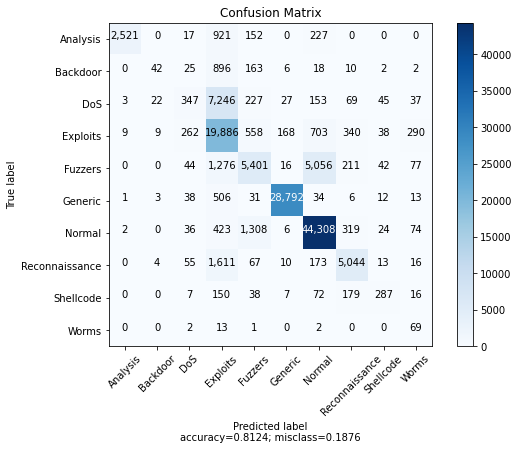

In [63]:
plot_confusion_matrix(cm           = confussion_matrix, 
                      normalize    = False,
                      target_names = ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic','Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
                      title        = "Confusion Matrix")

In [64]:
target_class=[]
target_class=["Analysis","Backdoor","DoS", "Exploits", "Fuzzers", "Generic","Normal","Reconnaissance", "Shellcode", "Worms"]

In [65]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [66]:
pred1 = model.predict(x_test_2)

4105/4105 [==============================] - 18s 4ms/step


<ipython-input-67-18c72fbc59ac>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


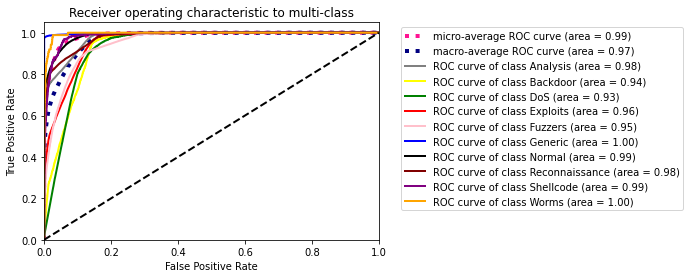

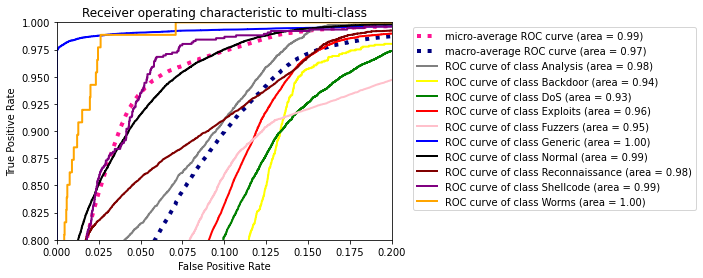

In [67]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 10

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['grey', 'yellow', 'green','red','pink','blue','black','maroon','purple','orange'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#zoom in the plot
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['grey', 'yellow', 'green','red','pink','blue','black','maroon','purple','orange'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_class[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()